In this notebook, we explore the dataset given for the challenge. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
# set precision for pandas
pd.set_option('display.precision', 3)
# TODO: commented this out, visual inspection can be good to form intuition but is not reliable + slows down and bulks up NB
# pd.options.display.max_rows = 1000
# pd.options.display.max_columns = 200

import numpy as np

# imports to set up plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [3]:
# load data 
df = pd.read_csv('../data/train.csv')

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
# check columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [5]:
# describe data
df.info(show_counts = True)
numeric_cols = ["Age", "Annual_Premium", "Vintage"]
categorical_cols = ["Gender", "Driving_License", "Region_Code", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage", "Policy_Sales_Channel"]
binary_cols = ["Gender", "Driving_License", "Previously_Insured", "Vehicle_Damage"]
categorical_cols = [col for col in categorical_cols if col not in binary_cols]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   id                    11504798 non-null  int64  
 1   Gender                11504798 non-null  object 
 2   Age                   11504798 non-null  int64  
 3   Driving_License       11504798 non-null  int64  
 4   Region_Code           11504798 non-null  float64
 5   Previously_Insured    11504798 non-null  int64  
 6   Vehicle_Age           11504798 non-null  object 
 7   Vehicle_Damage        11504798 non-null  object 
 8   Annual_Premium        11504798 non-null  float64
 9   Policy_Sales_Channel  11504798 non-null  float64
 10  Vintage               11504798 non-null  int64  
 11  Response              11504798 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


There are no missing values in the dataset.
Some variables to look at more closely:
 
0. How is the balance of the dataset?
1. Why is Driving_License in int? Is it 1-0 encoded? 
2. Why is Region_Code a float? How many unique values? Does this need to be 1-0 encoded?
3. Vehicle_Age -> categorical encoding (1, 2, 3)
4. Vehicle_Damage -> 1-0 encoding
5. What is the Vintage variable?
6. What is the policy sales channel variable?

#### Balance

In [6]:
df['Response'].value_counts(normalize=True)

Response
0    0.877
1    0.123
Name: proportion, dtype: float64

The dataset is heavily imbalanced, with an almost 9:1 ratio of 0 (does not purchase car insurance) to 1. 

#### Driving_License

In [7]:
# check values
# TODO: two ouptuts, first is overwritten
# df['Driving_License'].value_counts()
df['Driving_License'].value_counts(normalize = True)

Driving_License
1    0.998
0    0.002
Name: proportion, dtype: float64

Presumably whether client has a driving license. Who has a car but no driving license? These people most likely do not get insurance... 

In [8]:
pd.crosstab(df['Driving_License'], df['Response'])

Response,0,1
Driving_License,,
0,21502,1255
1,10068237,1413804


In [9]:
pd.crosstab(df['Driving_License'], df['Response'], normalize = 'index')

Response,0,1
Driving_License,,
0,0.945,0.055
1,0.877,0.123


Half as many people with no driving licence buy insurance than those with driving license 

#### Region_code

In [10]:
# TODO: FYI - there are not 52 regions, zero indexed and a lonely float at 39.2
len(df['Region_Code'].unique())

54

In [11]:
# TODO: Preprocess: Fix signle entry of faulty region

df[df['Region_Code'] == 39.2]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
11370234,11370234,Female,20,1,39.2,1,< 1 Year,No,2630.0,159.0,74,0


In [12]:
df['Region_Code'].value_counts().sort_index()

Region_Code
0.0      59274
1.0      33966
2.0     118097
3.0     246303
4.0      52504
         ...  
48.0    114230
49.0     50822
50.0    302334
51.0      1880
52.0      3450
Name: count, Length: 54, dtype: int64

52 regions -> most likely federal US states

#### Vintage

In [13]:
df["Vintage"].value_counts().sort_index()  # TODO: again, don't rely on visual inspection only

Vintage
10     25723
11     37077
12     21034
13     23862
14     20001
       ...  
295    30348
296    33415
297    33308
298    82529
299    26561
Name: count, Length: 290, dtype: int64

In [14]:
df["Vintage"].describe().apply(lambda x: format(x, '.2f'))

count    11504798.00
mean          163.90
std            79.98
min            10.00
25%            99.00
50%           166.00
75%           232.00
max           299.00
Name: Vintage, dtype: object

In [15]:
# Don't really understande what the vintage variable is. Let's do a crosstab with the target variable
pd.crosstab(df['Vintage'], df['Response'], normalize = 'index')

Response,0,1
Vintage,,
10,0.902,0.098
11,0.756,0.244
12,0.845,0.155
13,0.885,0.115
14,0.893,0.107
...,...,...
295,0.834,0.166
296,0.895,0.105
297,0.912,0.088


In [16]:
# TODO: I suggest we can look at statistical metrics of the crosstab before dismissing it after an inspection by eye
    # some Vintages seem to have an impact on Response, no?
pd.crosstab(df['Vintage'], df['Response'], normalize = 'index').describe()

Response,0,1
count,290.000,290.000
mean,0.873,0.127
std,0.054,0.054
min,0.680,0.042
25%,0.847,0.090
50%,0.885,0.115
75%,0.910,0.153
max,0.958,0.320


doesn't seem to affect Response much. 

#### Policy_Sales_Channel

In [17]:
df["Policy_Sales_Channel"].value_counts().sort_index()  # TODO: same comment as above

Policy_Sales_Channel
1.0       32960
2.0           6
3.0       14066
4.0       13284
5.0           1
          ...  
157.0    200672
158.0     14540
159.0      1417
160.0    640380
163.0     85299
Name: count, Length: 152, dtype: int64

: 

I can't really think of a meaning for this variable where the ordinal encoding makes sense. I would 1-hot encode this variable as well.

### Dataset description

In [ ]:
# we encode the categorical variables
# TODO: unfortunately this crashes on my machine > probably due to size of expanded df
    # implementing the policy sales channel grouping could solve this for me.
    # memory usage at 12 columns is ~1GB, how much do you expect it to be after one hot encoding sales channels?
from preprocessing import map_categorical_to_int

df_master = map_categorical_to_int(df)

df_master.head()

In [16]:
df_master.columns

Index(['id', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Annual_Premium', 'Vintage', 'Response', 'Gender_Female', 'Gender_Male',
       ...
       'Policy_Sales_Channel_152', 'Policy_Sales_Channel_153',
       'Policy_Sales_Channel_154', 'Policy_Sales_Channel_155',
       'Policy_Sales_Channel_156', 'Policy_Sales_Channel_157',
       'Policy_Sales_Channel_158', 'Policy_Sales_Channel_159',
       'Policy_Sales_Channel_160', 'Policy_Sales_Channel_163'],
      dtype='object', length=217)

We now have a dataset with 216 variables + target. 

### Uni- and bivariate Analysis

In [17]:
# describe variables by response

columns_to_show = ["Age", "Previously_Insured", "Annual_Premium", "Vintage"]
df.groupby(['Response'])[columns_to_show].describe().map(lambda x: format(x, '.3f'))

Age                                                  \
                 count    mean     std     min     25%     50%     75%   
Response                                                                 
0         10089739.000  37.698  15.298  20.000  24.000  33.000  49.000   
1          1415059.000  43.273  11.478  20.000  35.000  43.000  50.000   

                 Previously_Insured                                            \
             max              count   mean    std    min    25%    50%    75%   
Response                                                                        
0         85.000       10089739.000  0.528  0.499  0.000  0.000  1.000  1.000   
1         83.000        1415059.000  0.002  0.049  0.000  0.000  0.000  0.000   

                Annual_Premium                                             \
            max          count       mean        std       min        25%   
Response                                                                    
0         1.000   10089739.000  30262.572  16267.315  2630.000  25222.000   
1         1.000    1415059.000  31878.851  17669.135  2630.000  25962.000   

                                                 Vintage                   \
                50%        75%         max         count     mean     std   
Response                                                                    
0         31611.000  39182.000  540165.000  10089739.000  164.352  80.114   
1         34184.000  43412.000  540165.000   1415059.000  160.657  78.939   

                                                     
             min     25%      50%      75%      max  
Response                                             
0         10.000  99.000  167.000  233.000  299.000  
1         10.000  99.000  164.000  225.000  299.000

In [18]:
# Driving License by itself because of precision
df.groupby(['Response'])['Driving_License'].describe().map(lambda x: format(x, '.10f'))

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,10089739.0000000000,0.9978689241,0.0461143650,0.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000
1,1415059.0000000000,0.9991131112,0.0297674801,0.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000


Age and Previously_Insured have the most significant differences by Response. 

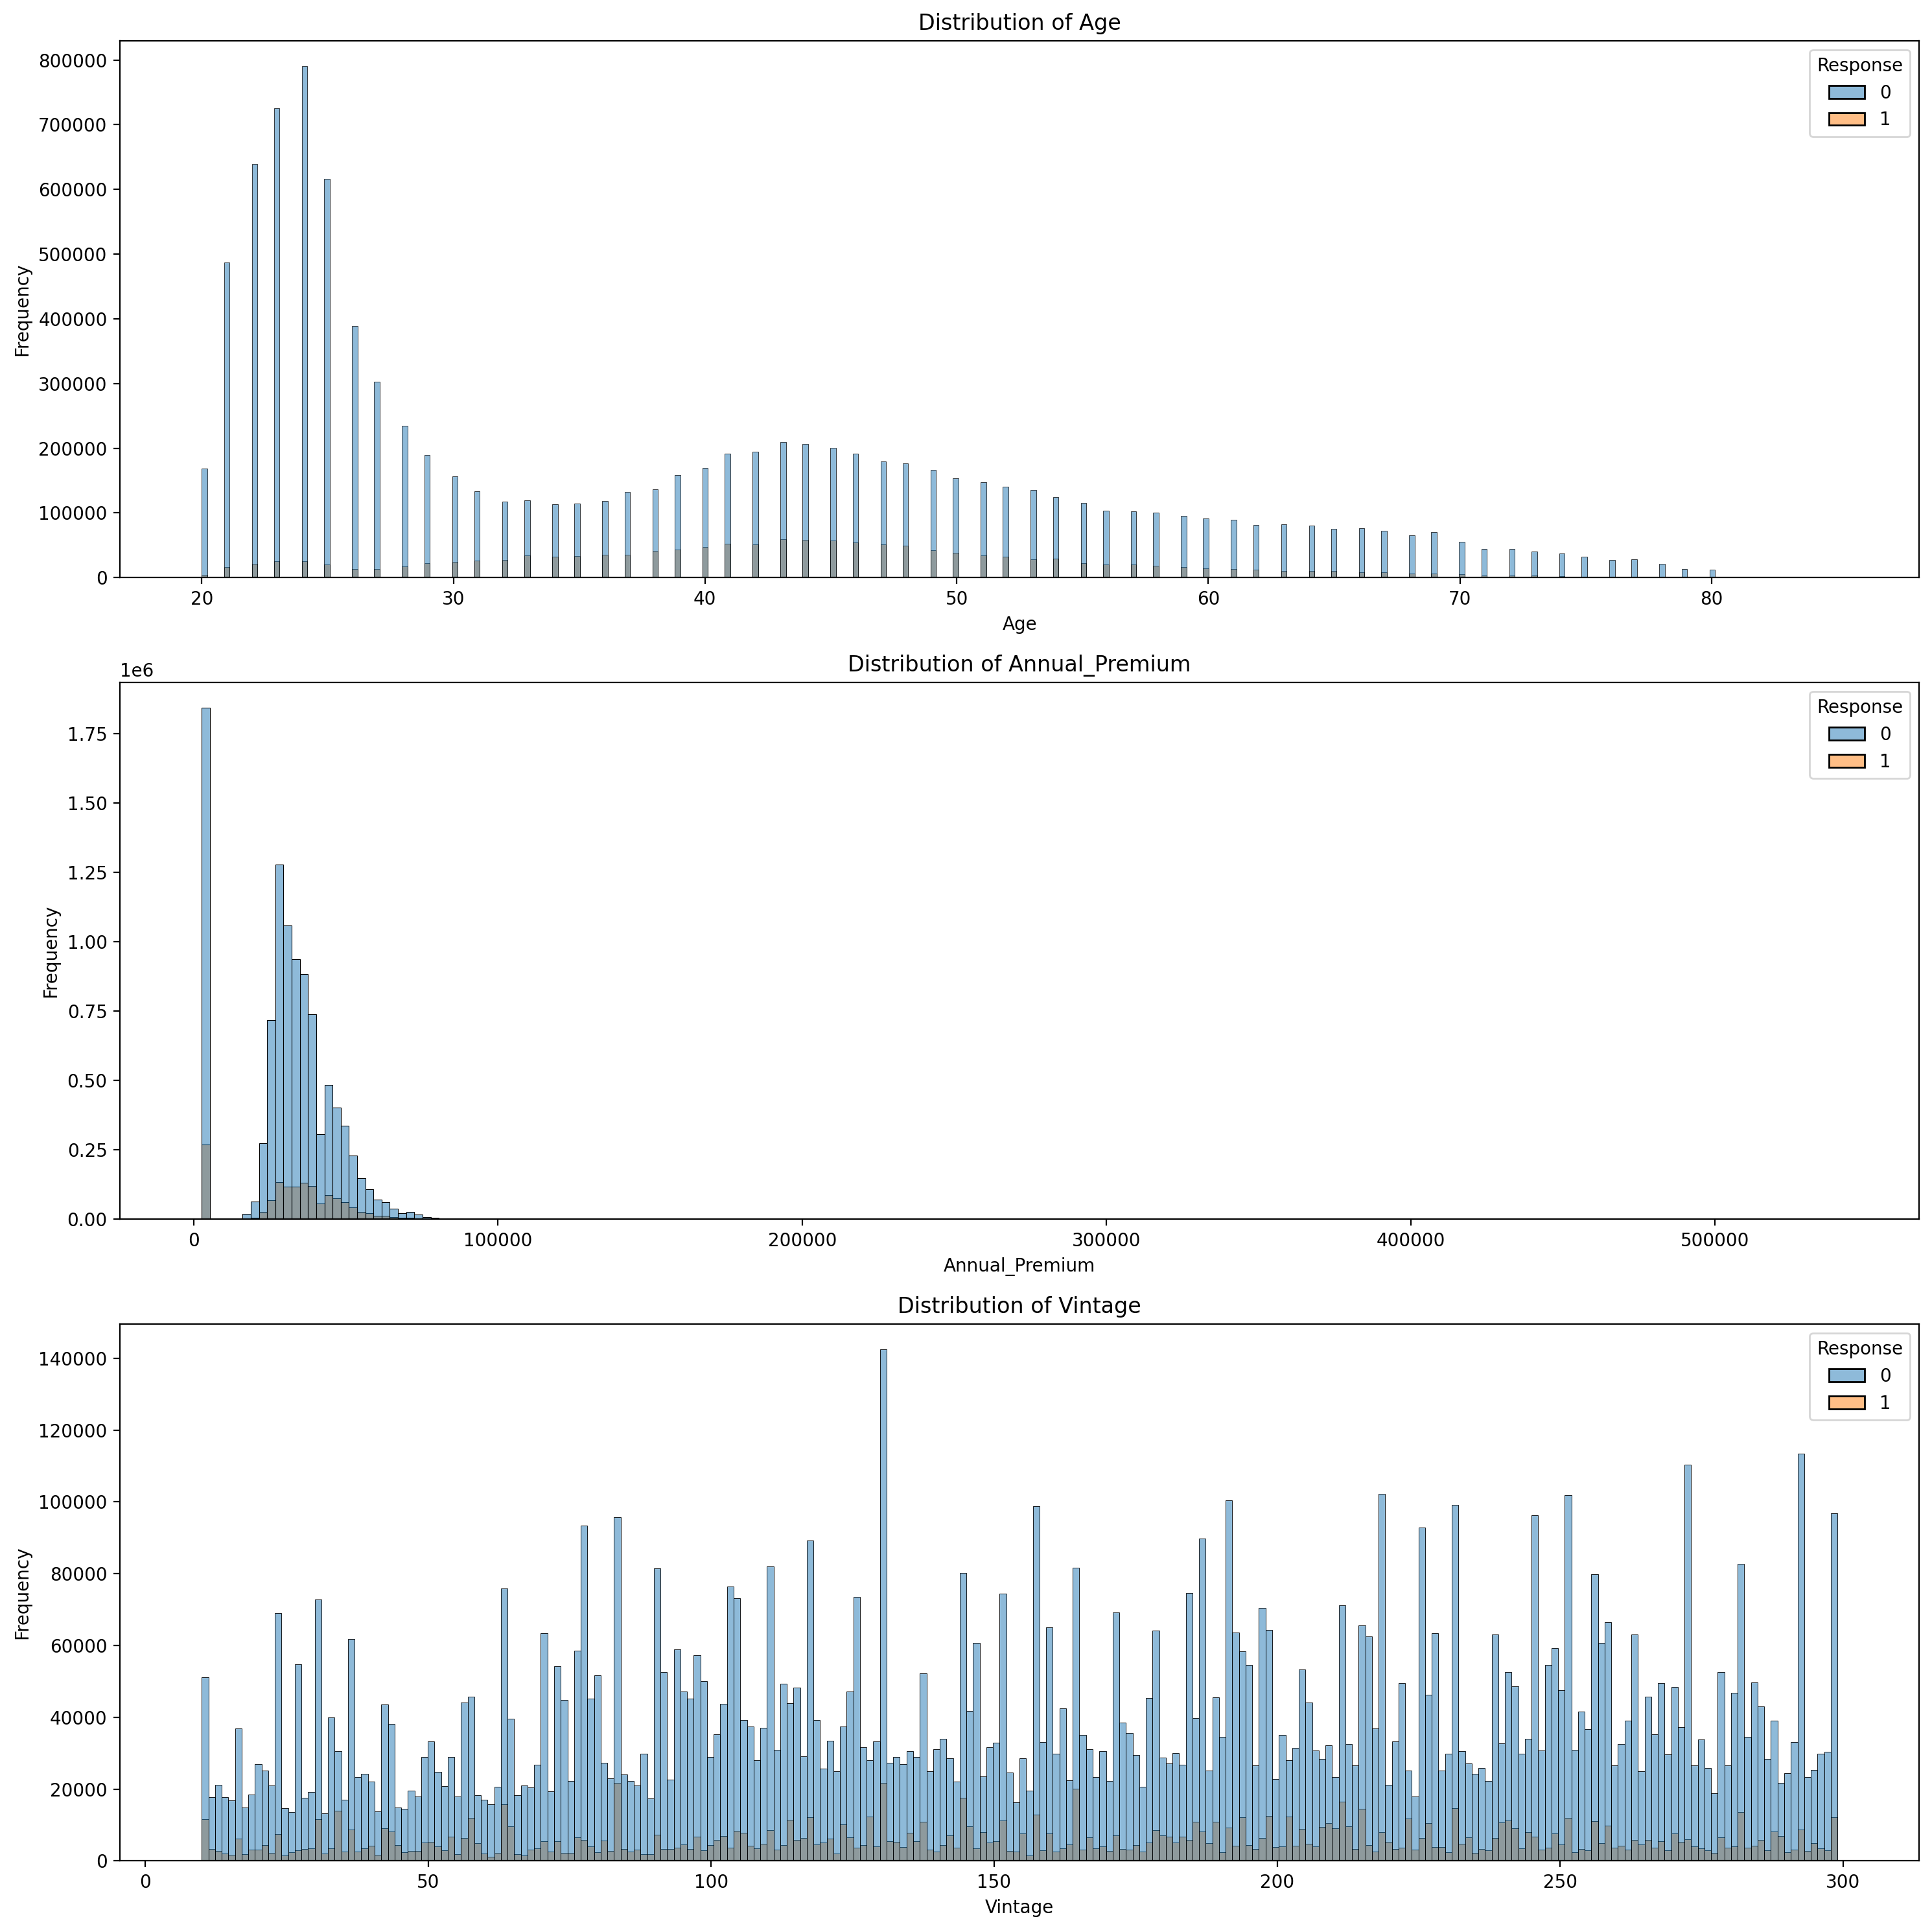

In [19]:
# Plot distributions for numeric columns
histogram_variables = {"Age": None, "Annual_Premium": 200, "Vintage": None}
n_cols = 1  # Number of columns for subplots
n_rows = len(histogram_variables) // n_cols + (len(histogram_variables) % n_cols > 0)  # Calculate rows based on total numeric cols

# Set the figure size based on the number of subplots
plt.figure(figsize=(15, 5 * n_rows))

# Loop through each numeric column and create a subplot
for i, col in enumerate(histogram_variables.items(), 1):  # Start indexing from 1
    plt.subplot(n_rows, n_cols, i)
    if col[1] is None:
        sns.histplot(x=col[0], hue="Response", data=df)
    else:
        sns.histplot(x=col[0], hue="Response", data=df, bins=col[1])  # You can use `kde=False` if you prefer only a histogram
    plt.title(f'Distribution of {col[0]}')
    plt.xlabel(col[0])
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

There is something fishy going on with the "Annual_Premium" variable. It has an atom around 0, more precisely between 2k and 3k:

<Axes: xlabel='Annual_Premium', ylabel='Count'>

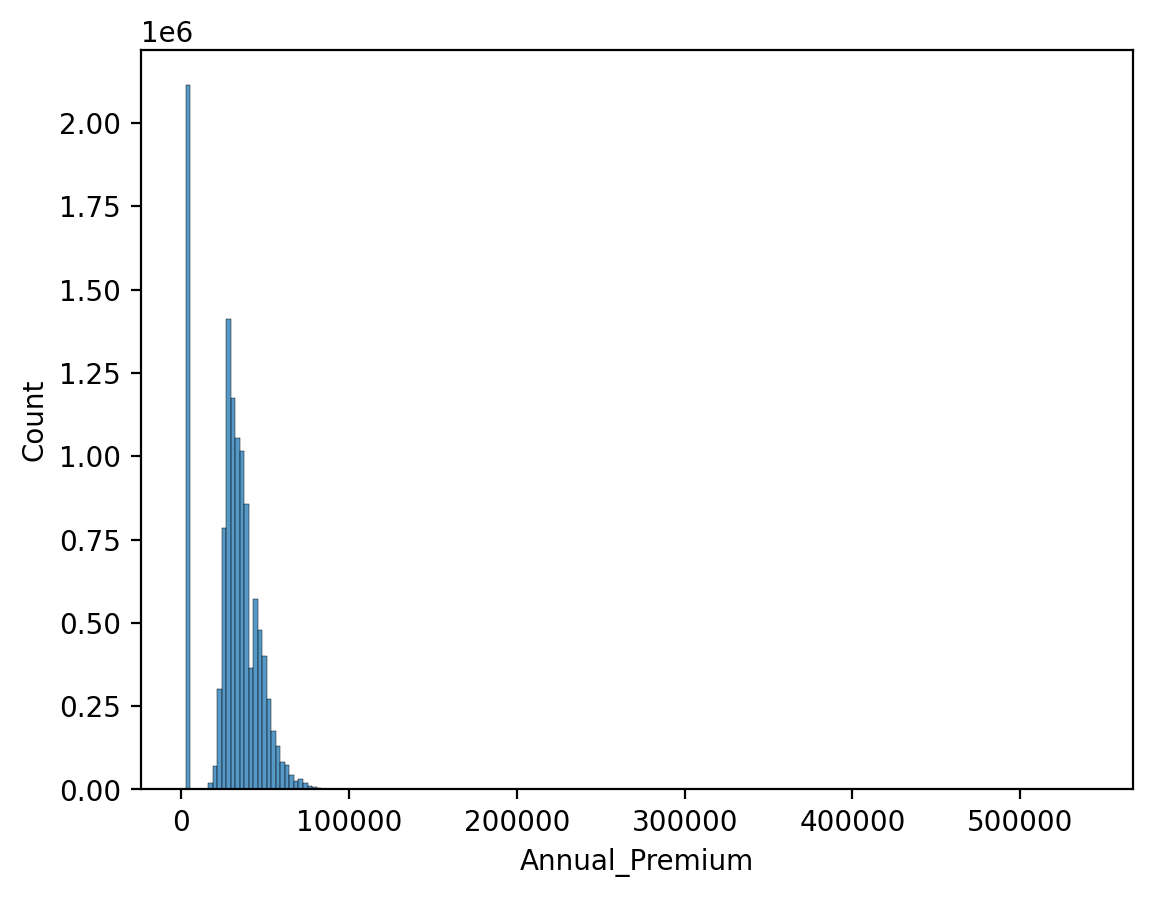

In [20]:
sns.histplot(df[df['Annual_Premium'] > 2000]['Annual_Premium'], bins = 200)

<Axes: xlabel='Annual_Premium', ylabel='Count'>

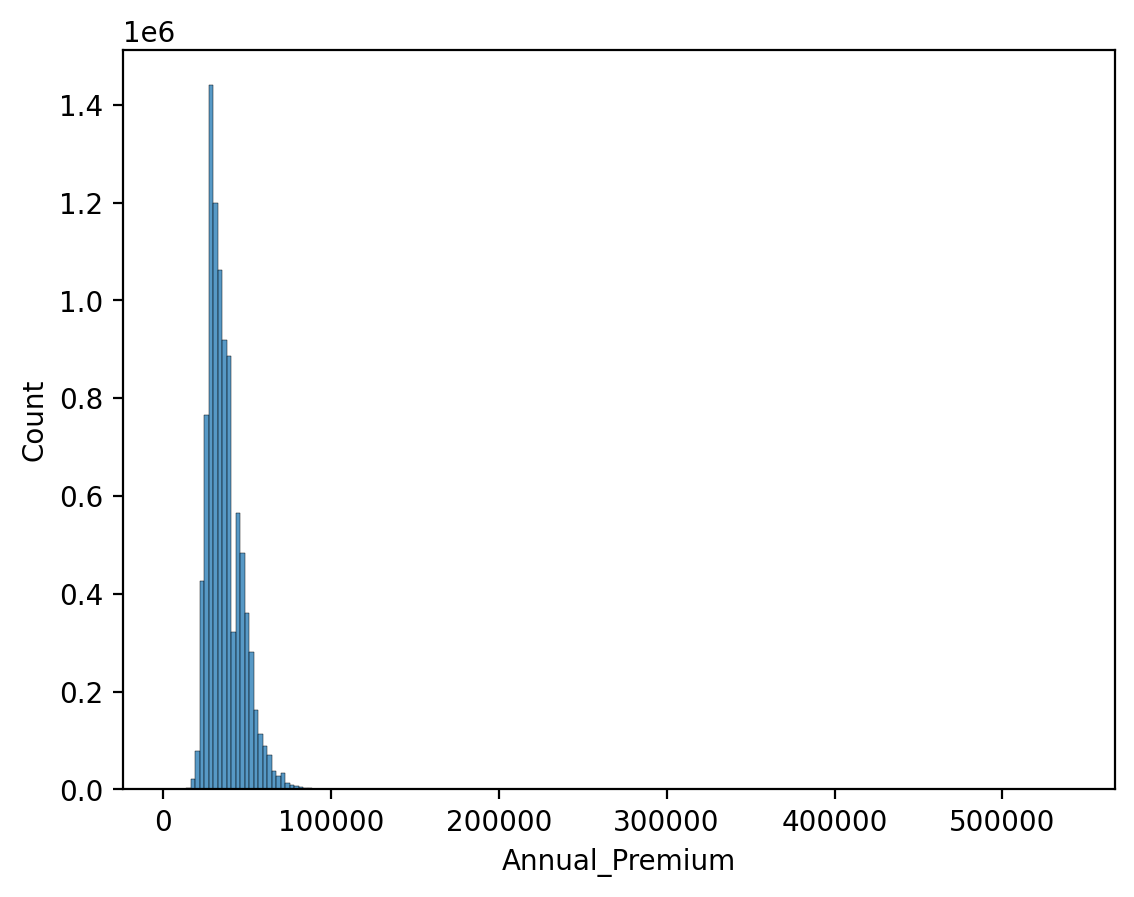

In [21]:
sns.histplot(df[df['Annual_Premium'] > 3000]['Annual_Premium'], bins = 200)

<Axes: xlabel='Annual_Premium', ylabel='Count'>

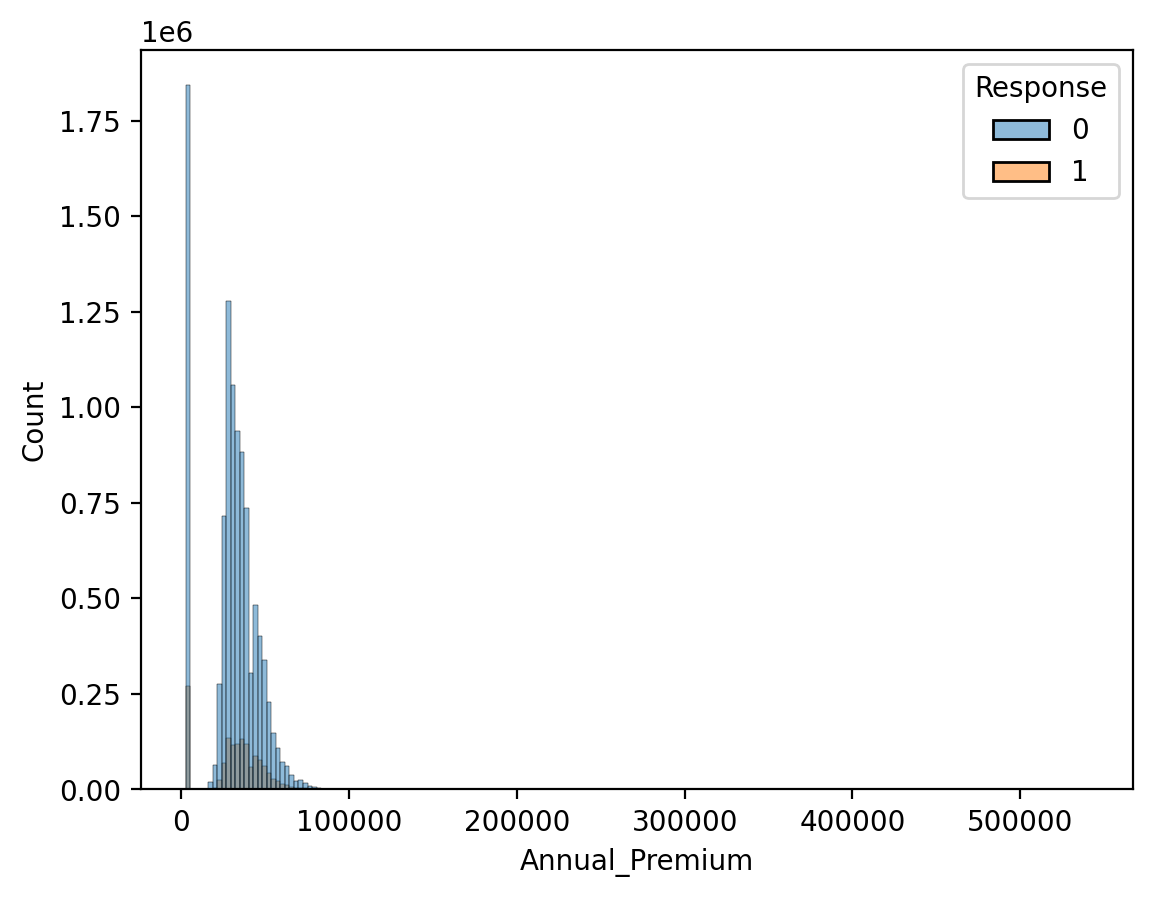

In [22]:
# The atom of the distribution remains even when grouping by target variable
sns.histplot(x="Annual_Premium", hue="Response", data=df[df['Annual_Premium'] > 2000], bins = 200)

Moreover, the distribution of Annual_Premium is heavily skewed to the right with heavy tails/outliers to be investigated separately. To bin this distribution we might need to use logarithmic binning.

<Axes: xlabel='Annual_Premium'>

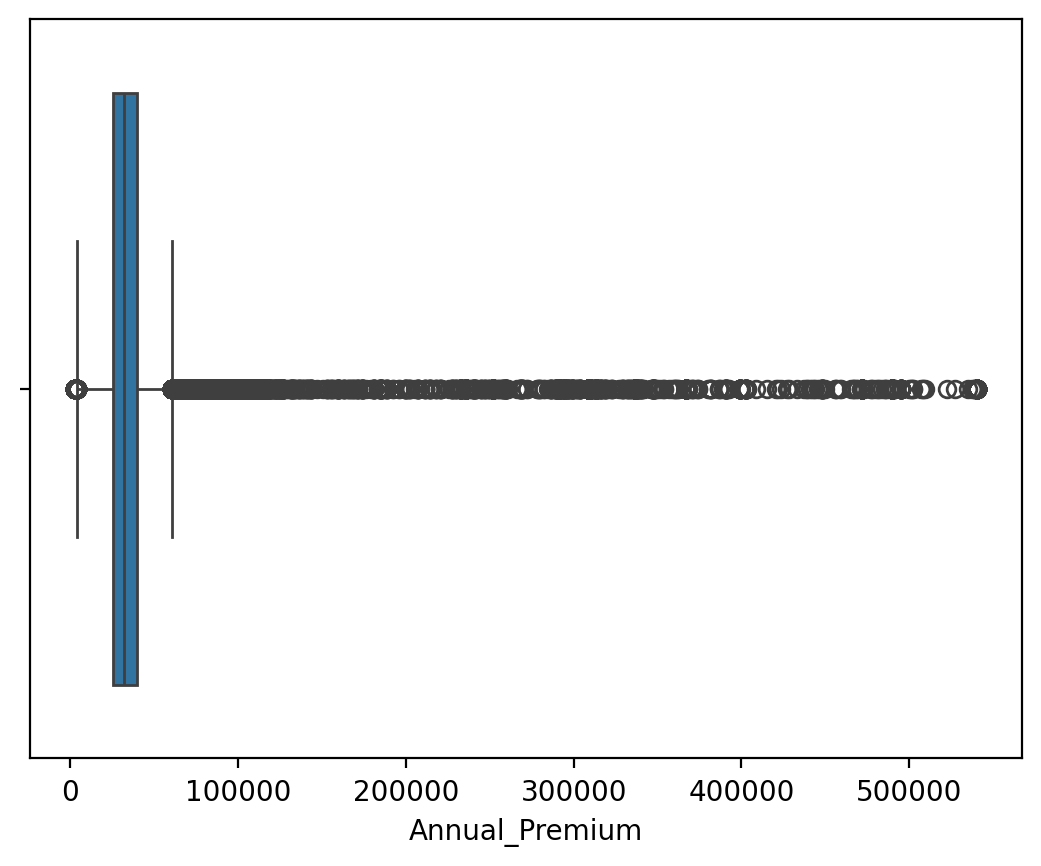

In [23]:
# boxplot of annual premium
sns.boxplot(x="Annual_Premium", data=df)

It's worth taking logs:

In [ ]:
# TODO: would you recommend that be a feature engineering step? (I see you summarize the findings at the end > which I like)
    # Would encourage you to explicitly draw conclusions > what todos does your EDA entail?
    # e.g. how to best preprocess and represent the data for further analysis / regression

<Axes: xlabel='Log_Annual_Premium', ylabel='Count'>

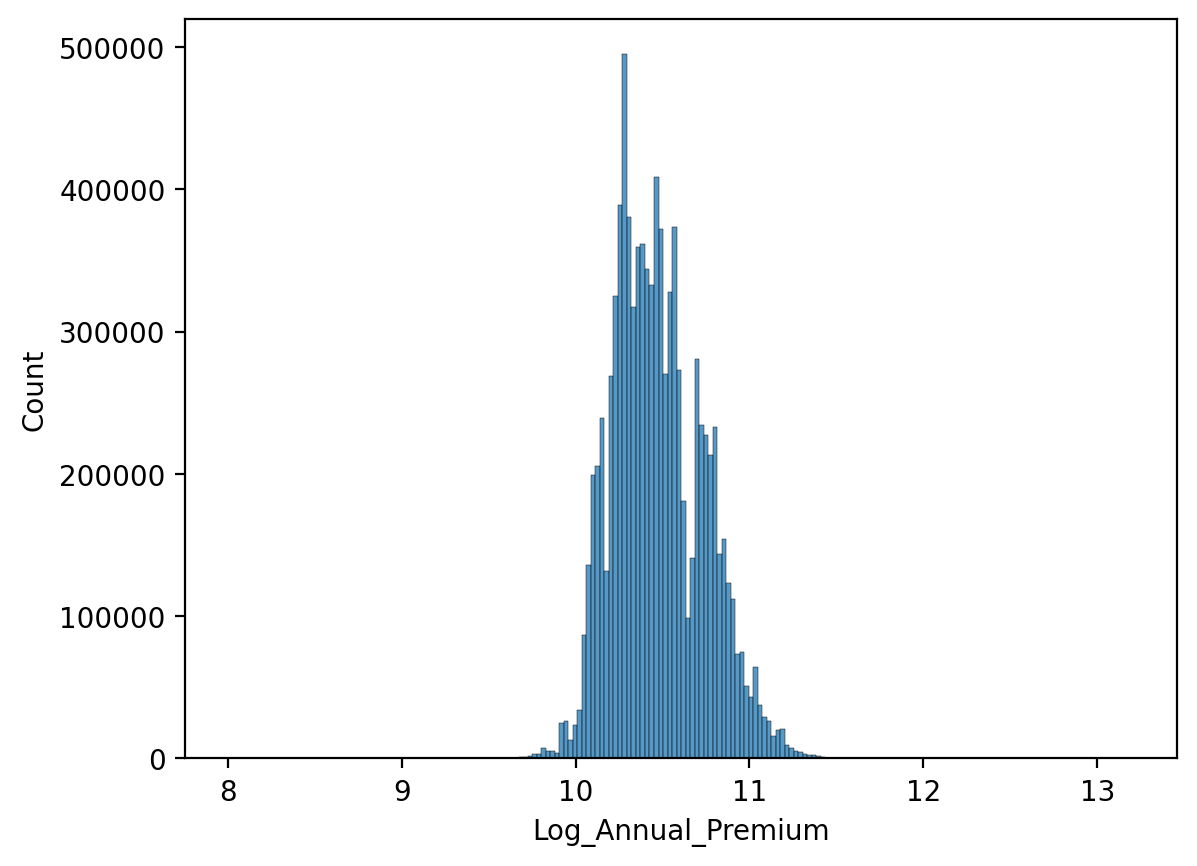

In [24]:
df['Log_Annual_Premium'] = np.log(df['Annual_Premium'])
sns.histplot(df[df['Annual_Premium'] > 3000]['Log_Annual_Premium'], bins = 200)

<Axes: xlabel='Log_Annual_Premium'>

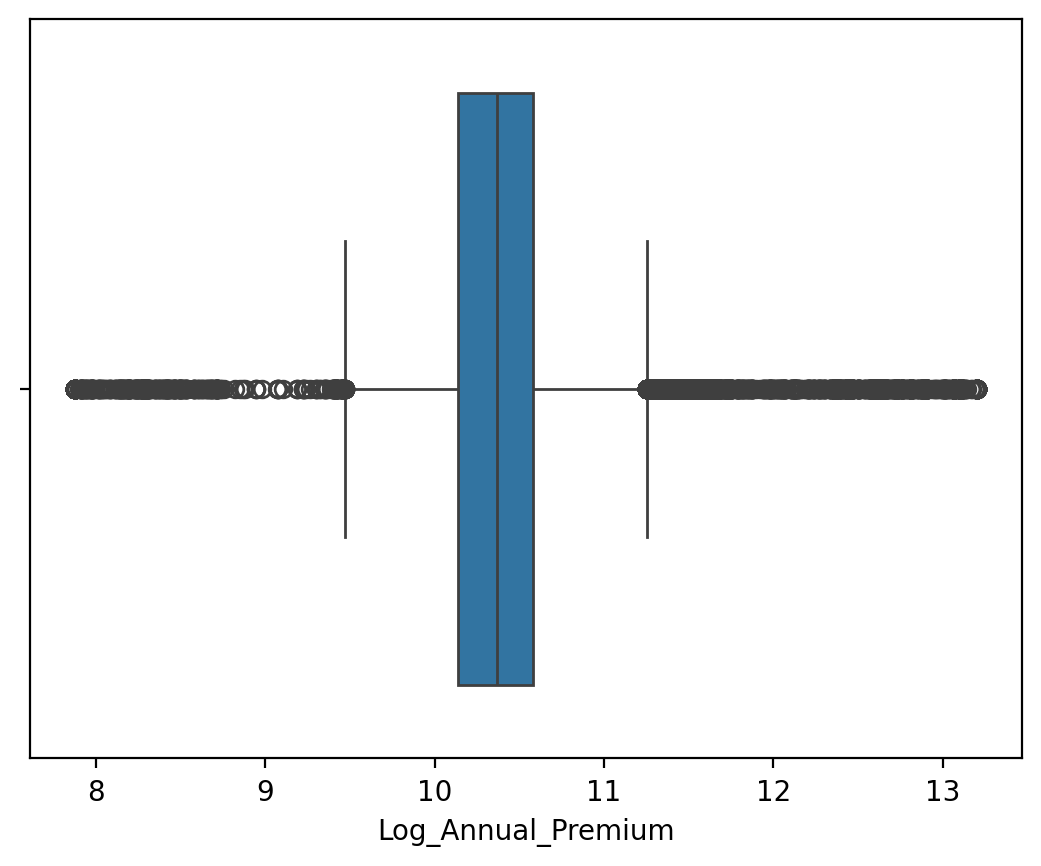

In [25]:
# boxplot of log annual premium
df['Log_Annual_Premium'] = np.log(df['Annual_Premium'])
sns.boxplot(x="Log_Annual_Premium", data=df)

And, since there still are very fat tails, display a plot with log bins:

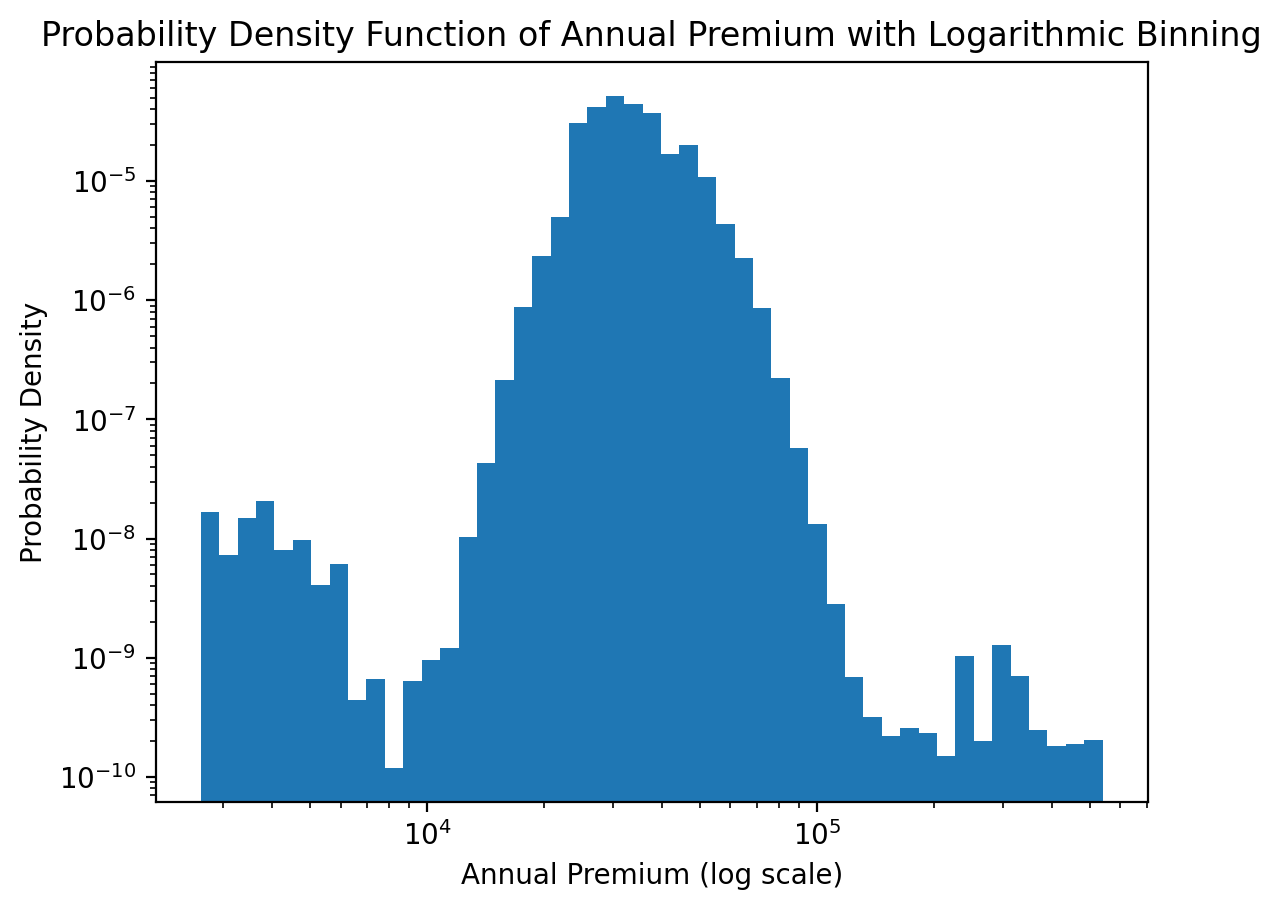

In [26]:
bins = np.logspace(np.log10(df['Annual_Premium'].min()), np.log10(df['Annual_Premium'].max()), 50)
plt.hist(df['Annual_Premium'], bins=bins, density=True, label='Annual Premium', log=True)

# Set logarithmic scale for the x-axis
plt.xscale('log', base = 10)

# Add labels and title
plt.xlabel('Annual Premium (log scale)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of Annual Premium with Logarithmic Binning')

plt.show()

The age variable seems to have different distributions when grouped by response.

<Axes: xlabel='count', ylabel='Age'>

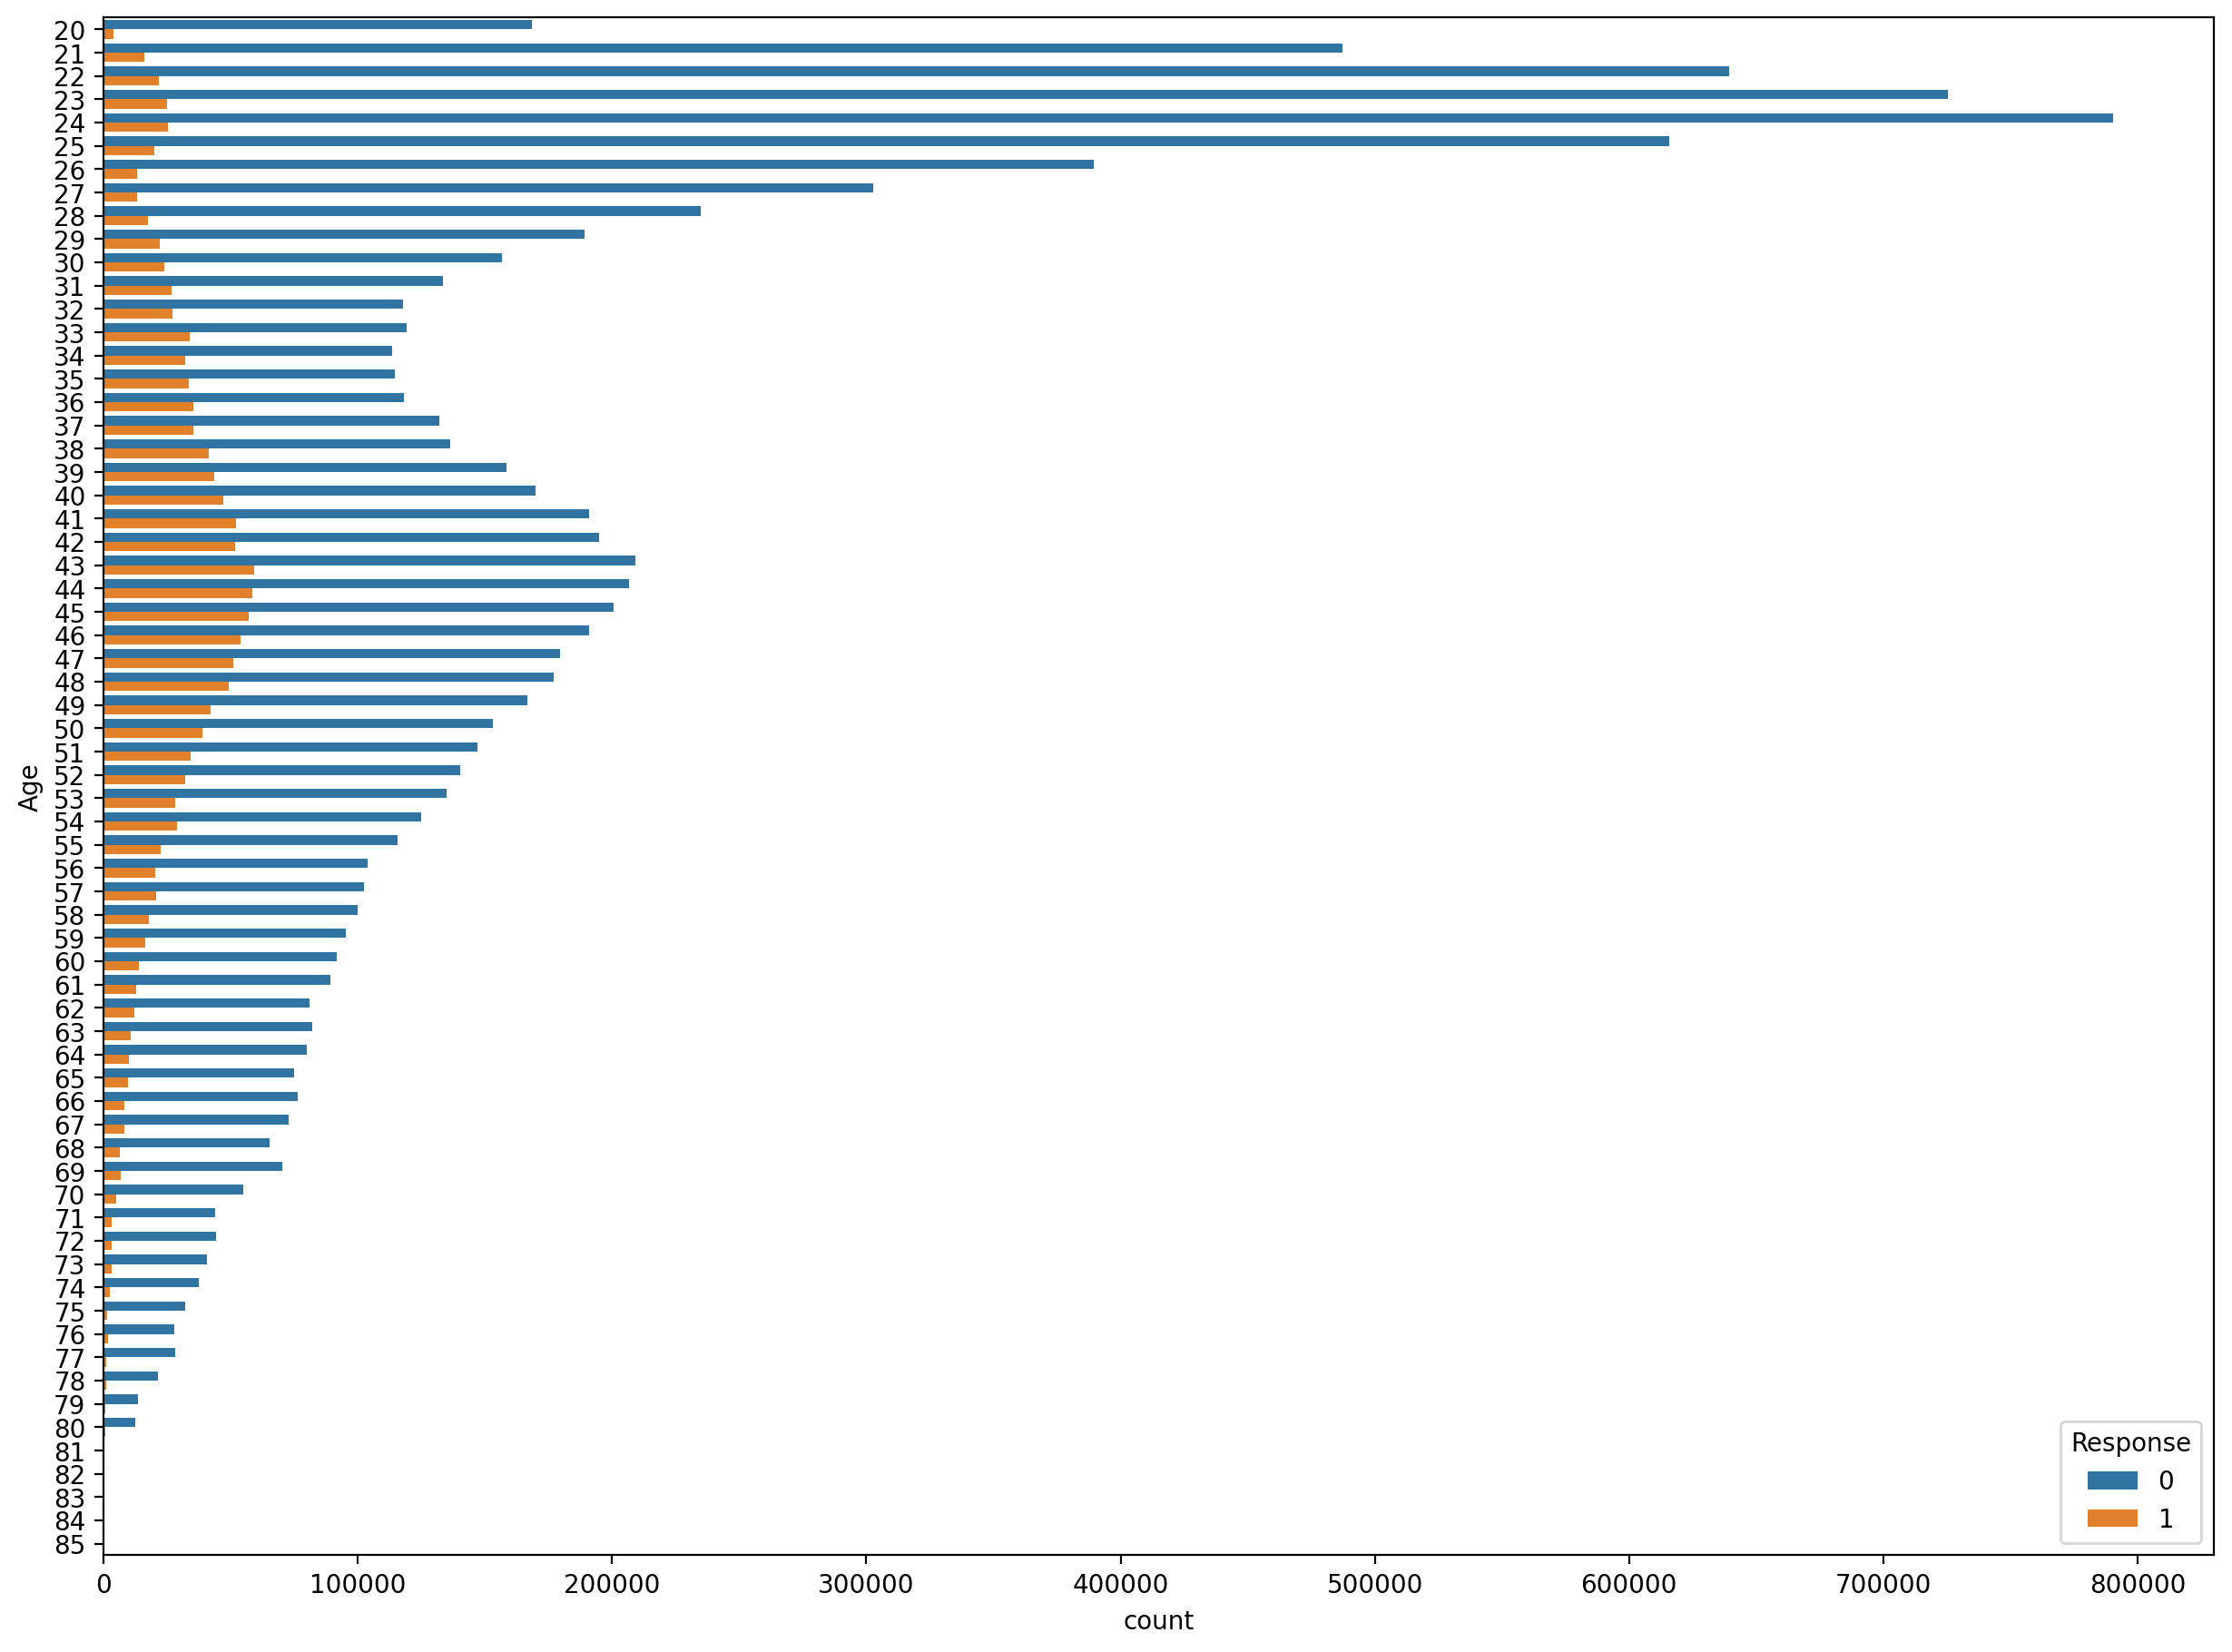

In [27]:
fig, ax = plt.subplots(figsize=(15, 11))
sns.countplot(y="Age", hue="Response", data=df)

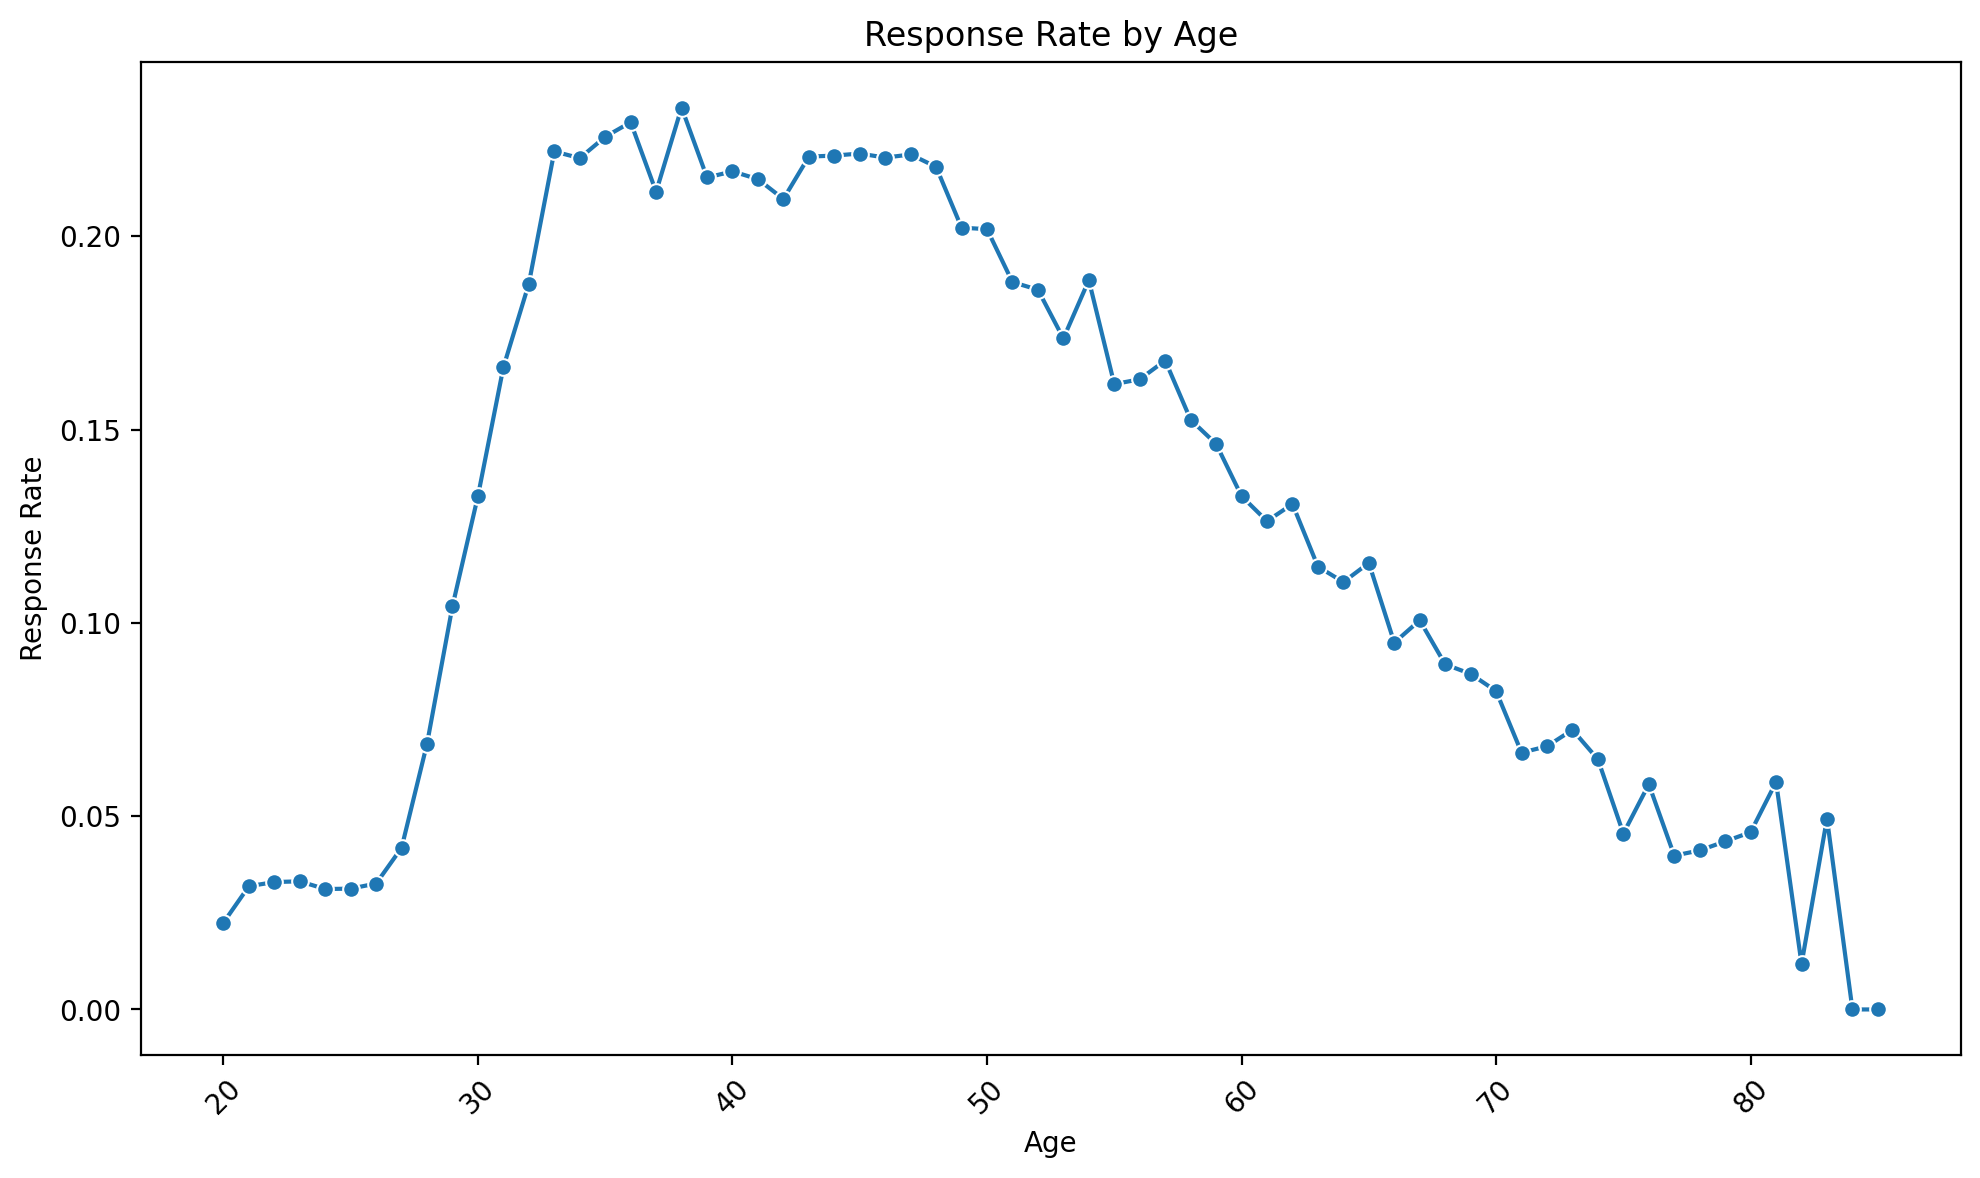

In [28]:
# Step 1: Calculate the response rate by Age
response_rate_by_age = df.groupby('Age')['Response'].mean().reset_index()

# Step 2: Plot the bar chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Response', marker='o', data=response_rate_by_age)

# Step 3: Customize the plot
plt.title('Response Rate by Age')
plt.xlabel('Age')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels if there are many age groups
plt.tight_layout()

# Show the plot
plt.show()

this is actually better and much easier:

In [ ]:
#TODO: if the version below is better and easier > you can delete the one on top. Removes duplicate / unused code

<Figure size 1000x600 with 0 Axes>

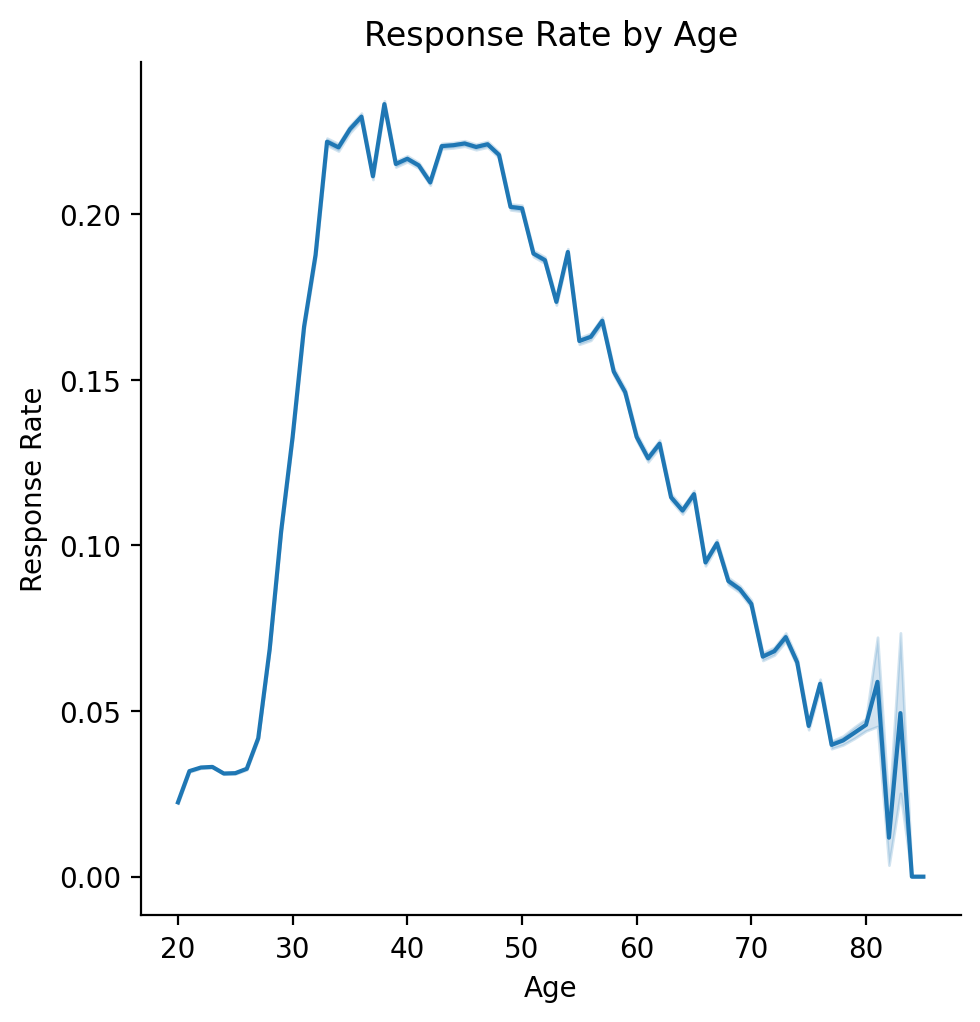

In [51]:
plt.figure(figsize=(10, 6))
sns.relplot(x="Age", y="Response", data=df, kind="line", errorbar = 'se')

plt.title('Response Rate by Age')
plt.xlabel('Age')
plt.ylabel('Response Rate')

plt.show()


In [60]:
df['Annual_Premium_Binned'][0]

Interval(61758.85, 67134.2, closed='right')

/var/folders/4d/nfzsks8x72ndb3gtxt09hvyh0000gn/T/ipykernel_99190/805365011.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_rate_by_premium = df.groupby('Annual_Premium_Binned_Midpoint')['Response'].mean().reset_index()
/var/folders/4d/nfzsks8x72ndb3gtxt09hvyh0000gn/T/ipykernel_99190/805365011.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_rate_by_log_premium = df.groupby('Log_Annual_Premium_Binned_Midpoint')['Response'].mean().reset_index()


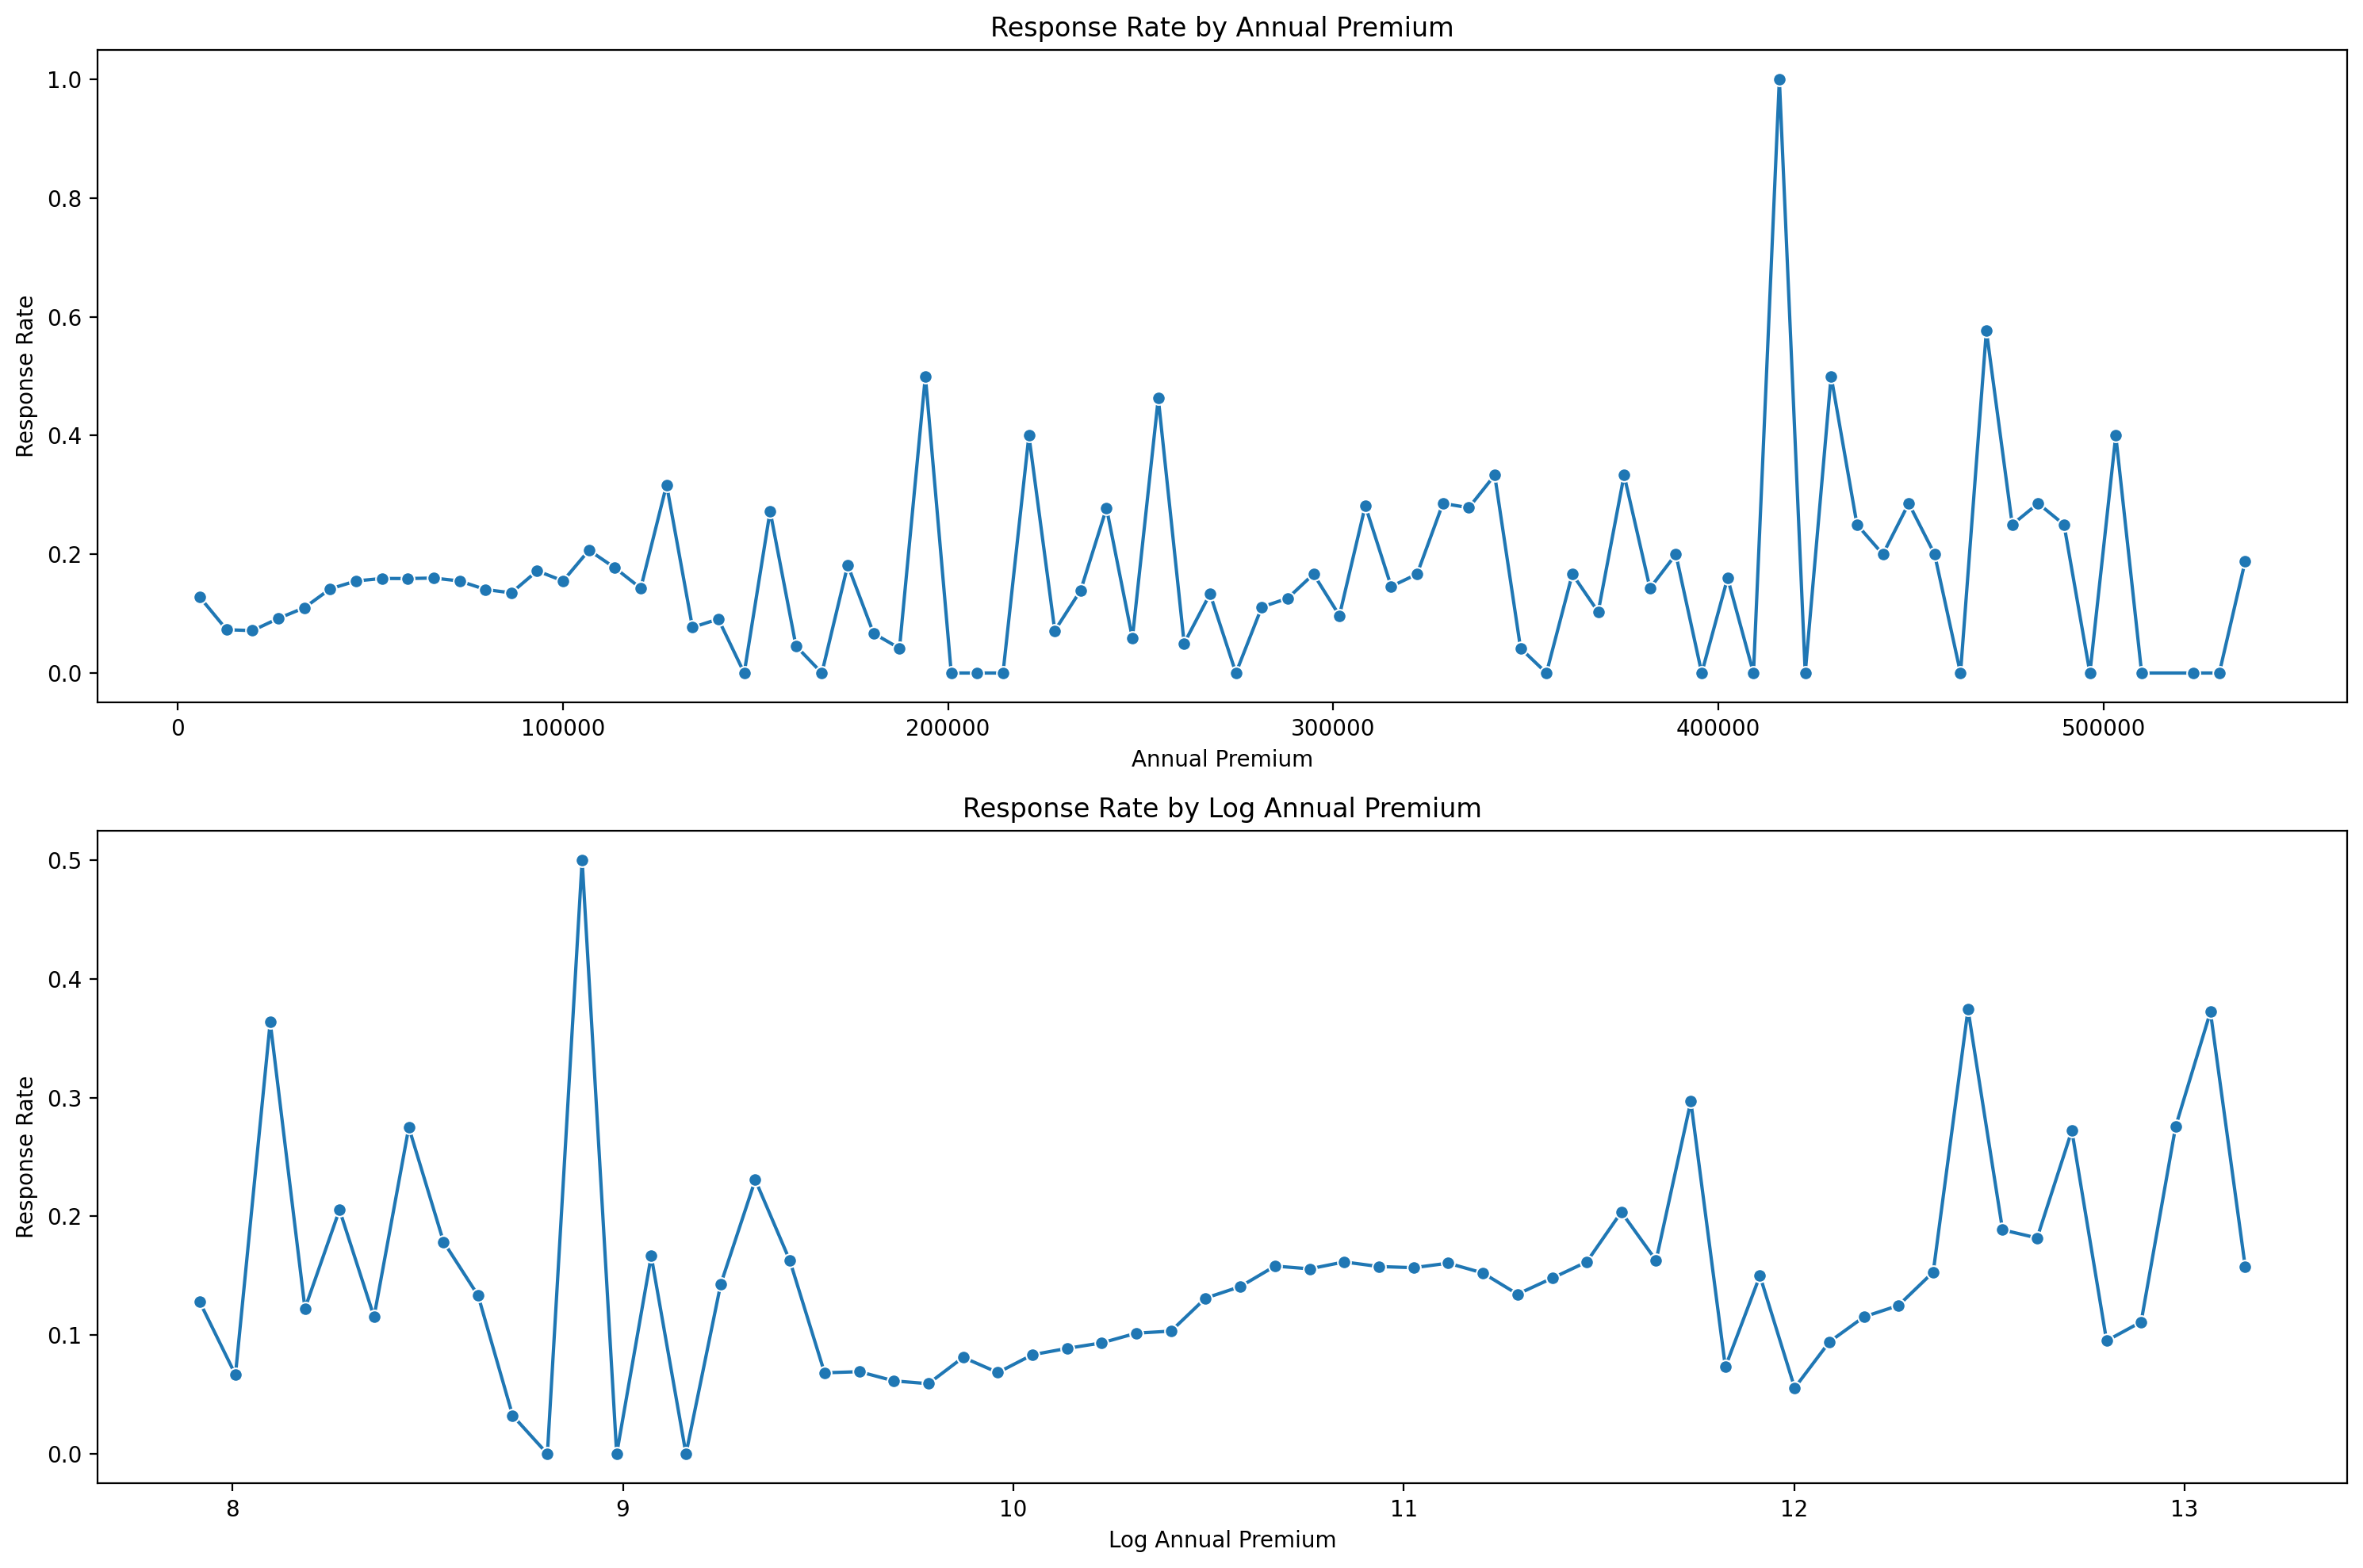

In [65]:
# create binned annual premium and log annual premium variables
df['Annual_Premium_Binned'] = pd.cut(df['Annual_Premium'], bins = 80, duplicates = 'drop')
df['Log_Annual_Premium_Binned'] = pd.cut(df['Log_Annual_Premium'], bins = 60, duplicates = 'drop')

# create midpoint of the bins
df['Annual_Premium_Binned_Midpoint'] = df['Annual_Premium_Binned'].apply(lambda x: x.mid)
df['Log_Annual_Premium_Binned_Midpoint'] = df['Log_Annual_Premium_Binned'].apply(lambda x: x.mid)

response_rate_by_premium = df.groupby('Annual_Premium_Binned_Midpoint')['Response'].mean().reset_index()
response_rate_by_log_premium = df.groupby('Log_Annual_Premium_Binned_Midpoint')['Response'].mean().reset_index()

# plot both response rates in one column
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

sns.lineplot(x='Annual_Premium_Binned_Midpoint', y='Response', marker='o', data=response_rate_by_premium, ax = ax[0])
sns.lineplot(x='Log_Annual_Premium_Binned_Midpoint', y='Response', marker='o', data=response_rate_by_log_premium, ax = ax[1])

ax[0].set_title('Response Rate by Annual Premium')
ax[0].set_xlabel('Annual Premium')
ax[0].set_ylabel('Response Rate')

ax[1].set_title('Response Rate by Log Annual Premium')
ax[1].set_xlabel('Log Annual Premium')
ax[1].set_ylabel('Response Rate')

plt.tight_layout()
plt.show()  


The relationship between age and response is highly nonlinear. It might be useful to do some feature engineering and use a dummy of the kind "Age >= 35 " in model building. 

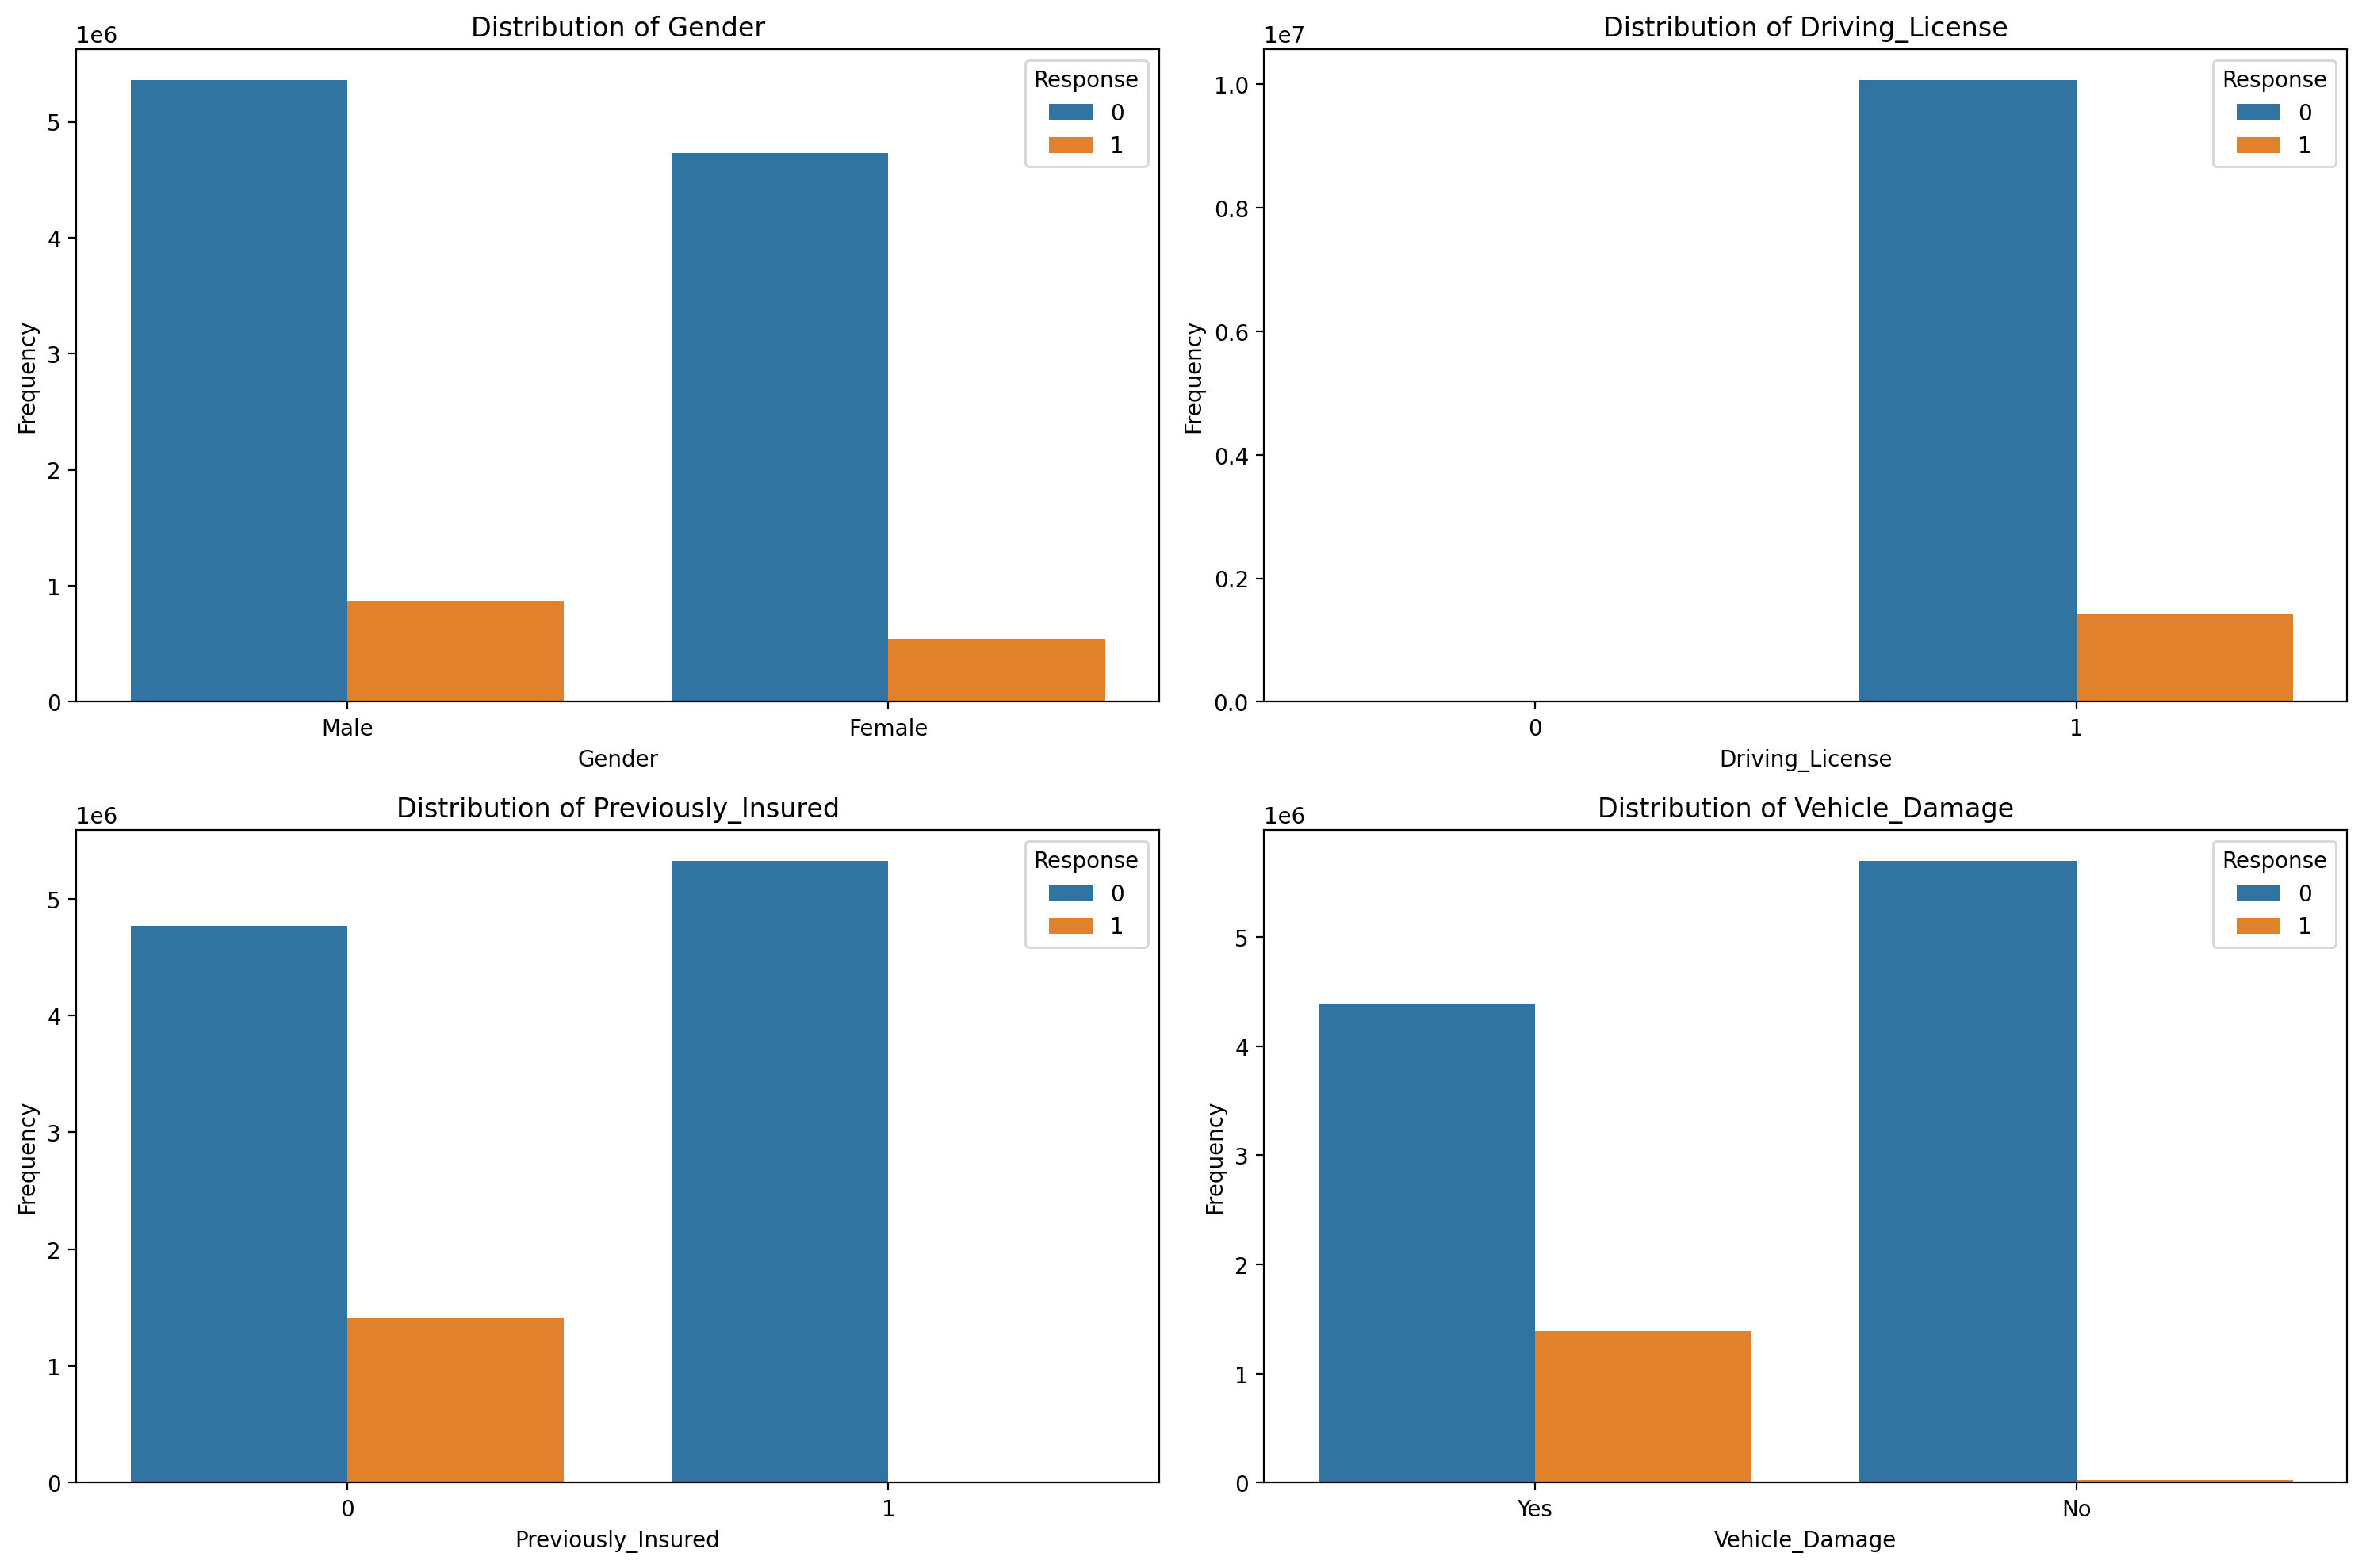

In [29]:
# bar plots of categorical variables
n_cols = 2  # Number of columns for subplots
n_rows = len(binary_cols) // n_cols + (len(binary_cols) % n_cols > 0)  

# Set the figure size based on the number of subplots
plt.figure(figsize=(15, 5 * n_rows))

# Loop through each column and create a subplot
for i, col in enumerate(binary_cols, 1):  # Start indexing from 1
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, hue="Response", data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


Gender: it seems like males have slightly higher response rate:

In [30]:
pd.crosstab(df["Gender"], df["Response"], normalize = 'index')

Response,0,1
Gender,,
Female,0.897,0.103
Male,0.860,0.140


Driving_License: people with no driving license seem to be statistically irrelevant

Previously_Insured: customers with previous insurance almost never purchase insurance again. -> Very high churn

In [31]:
pd.crosstab(df["Previously_Insured"], df["Response"], normalize = 'index')

Response,0,1
Previously_Insured,,
0,0.772,2.285e-01
1,0.999,6.383e-04


Essentially only customers with damaged vehicles purchase insurance:

In [32]:
pd.crosstab(df["Vehicle_Damage"], df["Response"], normalize = 'index')

Response,0,1
Vehicle_Damage,,
No,0.996,0.004
Yes,0.759,0.241


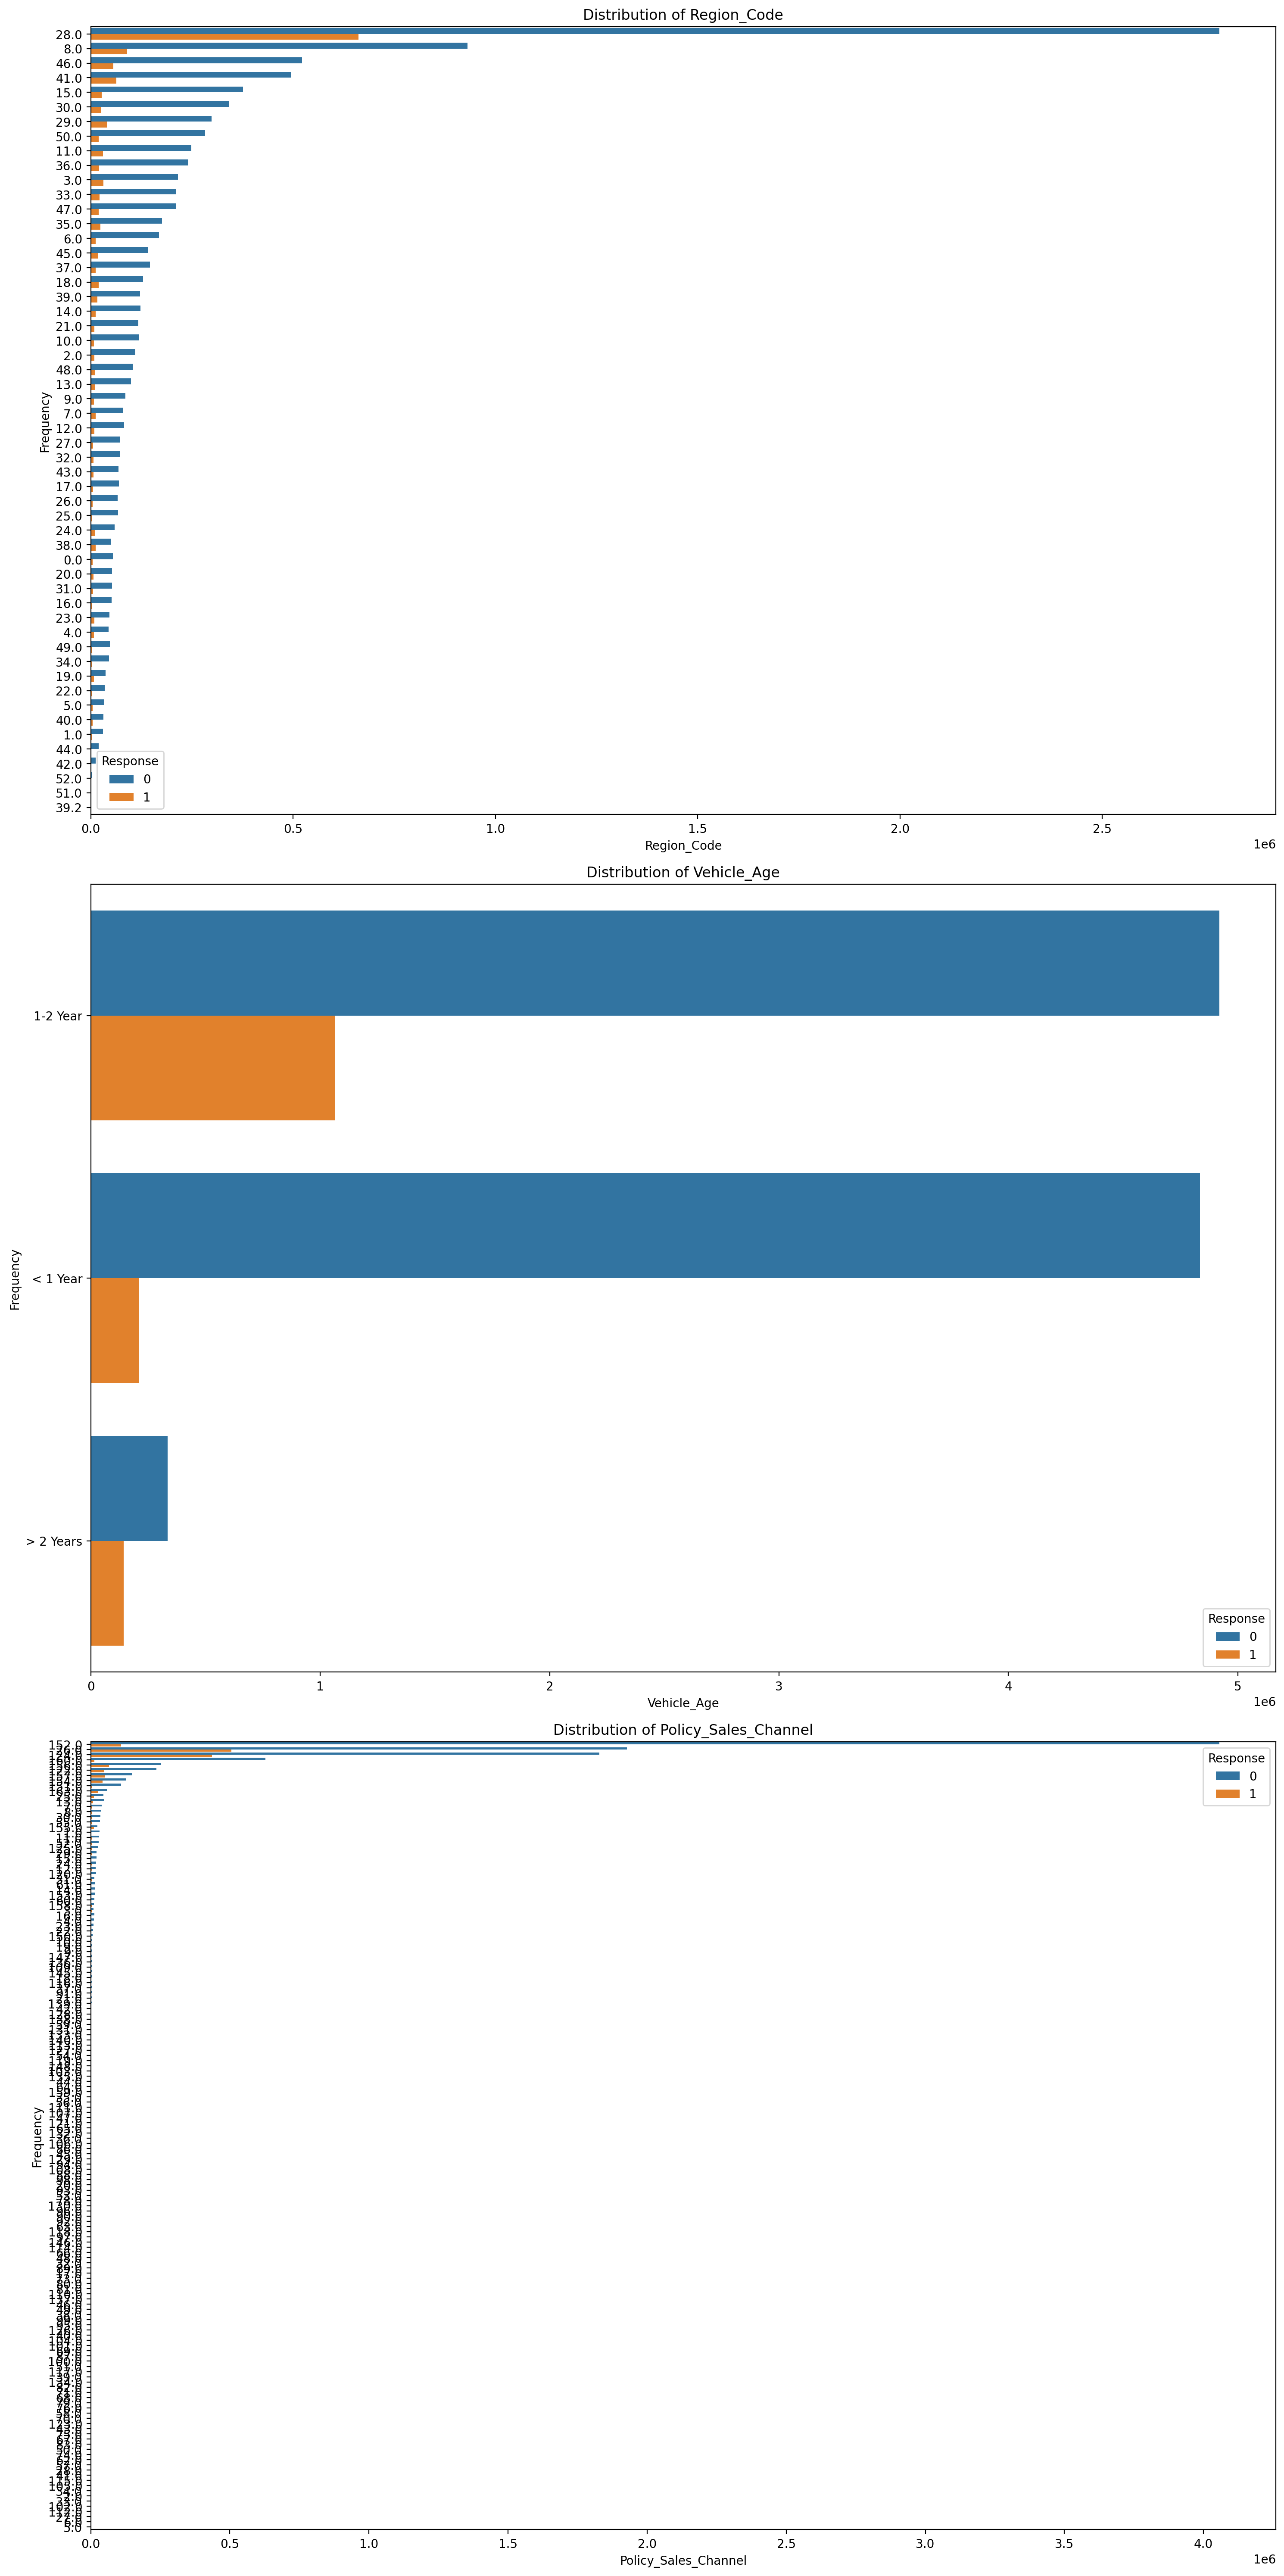

In [33]:
# bar plots of categorical variables
n_cols = 1  # Number of columns for subplots
n_rows = len(categorical_cols) // n_cols + (len(categorical_cols) % n_cols > 0)  

# Set the figure size based on the number of subplots
plt.figure(figsize=(15, 10 * n_rows))

# Loop through each column and create a subplot
for i, col in enumerate(categorical_cols, 1):  # Start indexing from 1
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(y=col, hue="Response", data=df, order = df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

Vehicle_Age: most customers have 1-2 y/o cars, but the insurance purchase rate increases quickly with car age:

In [34]:
pd.crosstab(df["Vehicle_Age"], df["Response"], normalize = 'index').sort_values(by = 1)

Response,0,1
Vehicle_Age,,
< 1 Year,0.959,0.041
1-2 Year,0.822,0.178
> 2 Years,0.701,0.299


Policy_Sales_Channel: most channels seem irrelevant:

In [35]:
# What regions purchase more insurance?

# Calculate the cross-tabulation with normalized values
cross_tab = pd.crosstab(df["Policy_Sales_Channel"], df["Response"], normalize='index')

# Add a column to show the count of observations by region
cross_tab['Count'] = df['Policy_Sales_Channel'].value_counts()

# sort by count
cross_tab = cross_tab.sort_values("Count", ascending=False)

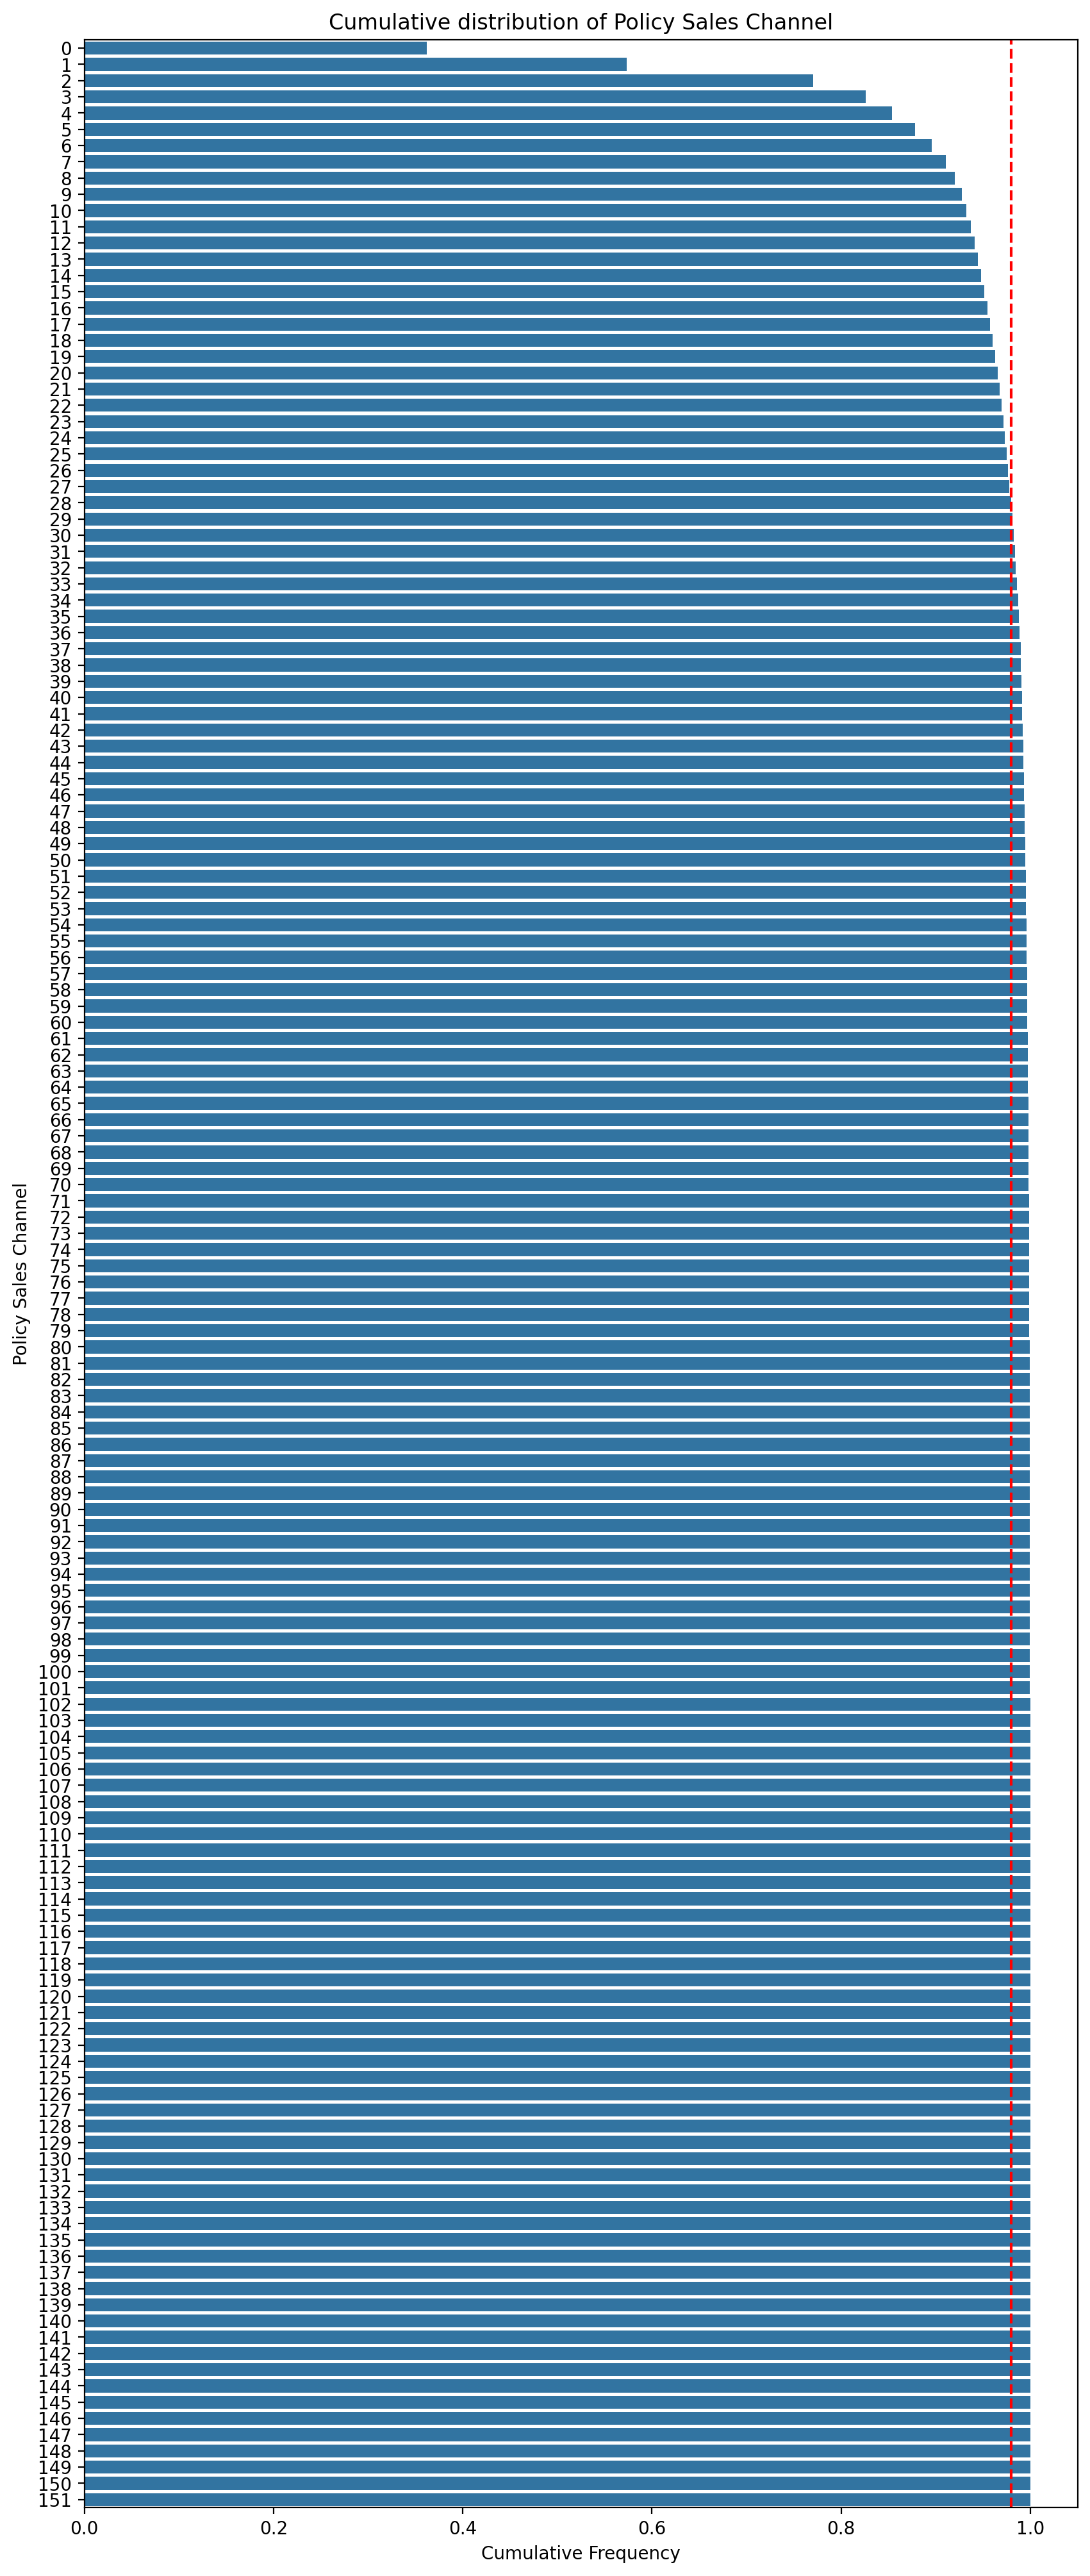

In [36]:
threshold = 0.98

# cumulative distribution plot
cross_tab['cumsum'] = cross_tab['Count'].cumsum()/cross_tab['Count'].sum()
cross_tab['order'] = cross_tab.reset_index().index
plt.figure(figsize=(10, 25))
sns.barplot(y='order', x='cumsum', orient='h', data=cross_tab)
#sns.lineplot(y='Policy_Sales_Channel', x='cumsum', data=cross_tab, orient='y')
plt.axvline(x=threshold, color='r', linestyle='--') 
plt.title(f'Cumulative distribution of Policy Sales Channel')
plt.xlabel('Cumulative Frequency')
plt.ylabel('Policy Sales Channel')

plt.show()


98% of all observations are within the top 28 values of Policy_Sales_Channel. We group the rest in an "other" category for a more meaningful distribution: 

In [45]:
cross_tab.reset_index(inplace = True)
channels_below_threshold = cross_tab[cross_tab['cumsum'] < threshold]['Policy_Sales_Channel'].values
df["Policy_Sales_Channel_Threshold"] = df["Policy_Sales_Channel"].apply(lambda x: x if x in channels_below_threshold else "Other")
df["Policy_Sales_Channel_Threshold"].value_counts()


Policy_Sales_Channel_Threshold
152.0    4166183
26.0     2433456
124.0    2264490
160.0     640380
156.0     316693
122.0     284289
Other     235596
157.0     200672
154.0     170067
151.0     111668
163.0      85299
25.0       55608
13.0       54334
7.0        44327
8.0        41346
30.0       38851
55.0       38441
155.0      33974
1.0        32960
11.0       32879
52.0       31330
125.0      30271
29.0       23605
15.0       22214
24.0       21779
12.0       21305
120.0      20456
31.0       18144
61.0       17372
14.0       16809
Name: count, dtype: int64

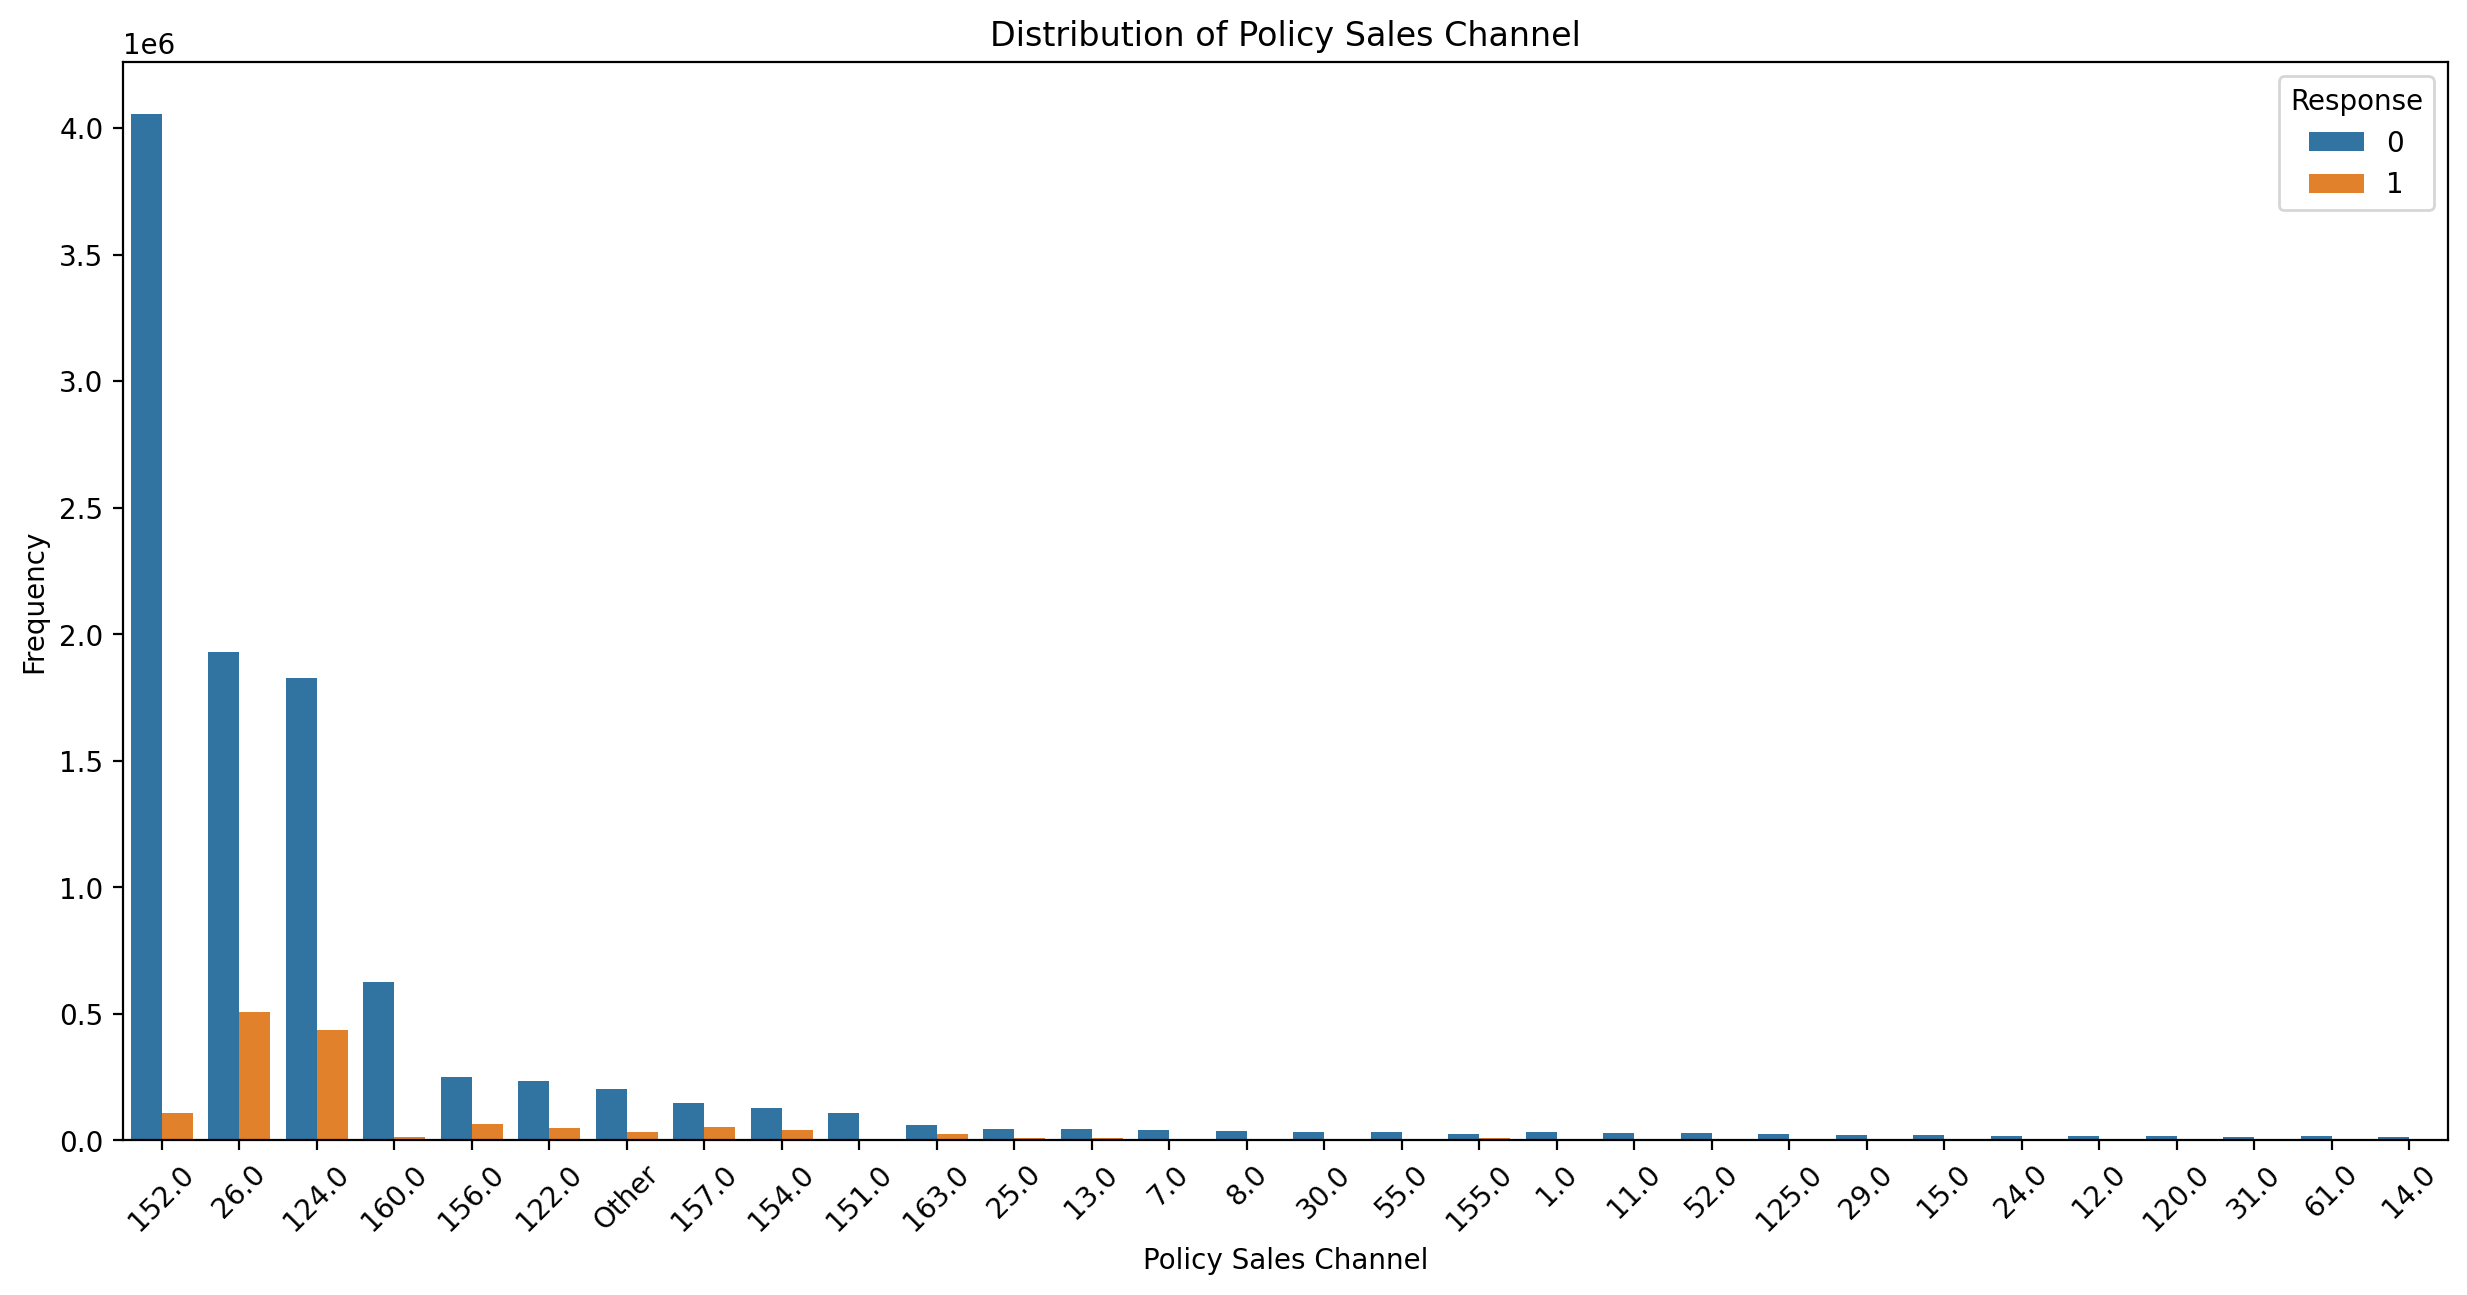

In [46]:
plt.figure(figsize=(15, 7))

sns.countplot(x="Policy_Sales_Channel_Threshold", hue="Response", data=df, order = df["Policy_Sales_Channel_Threshold"].value_counts().index)
plt.title(f'Distribution of Policy Sales Channel')
plt.xticks(rotation=45)
plt.xlabel("Policy Sales Channel")
plt.ylabel('Frequency')

plt.show()

#### Correlation between numeric, binary and ordinal variables

In [47]:
df_master.head()

,id,Age,Driving_License,Previously_Insured,Vehicle_Age,Annual_Premium,Vintage,Response,Log_Annual_Premium,Gender_Male,Vehicle_Damage_Yes,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34,Region_Code_35,Region_Code_36,Region_Code_37,Region_Code_38,Region_Code_39,...,Policy_Sales_Channel_107,Policy_Sales_Channel_108,Policy_Sales_Channel_109,Policy_Sales_Channel_110,Policy_Sales_Channel_111,Policy_Sales_Channel_112,Policy_Sales_Channel_113,Policy_Sales_Channel_114,Policy_Sales_Channel_115,Policy_Sales_Channel_116,Policy_Sales_Channel_117,Policy_Sales_Channel_118,Policy_Sales_Channel_119,Policy_Sales_Channel_120,Policy_Sales_Channel_121,Policy_Sales_Channel_122,Policy_Sales_Channel_123,Policy_Sales_Channel_124,Policy_Sales_Channel_125,Policy_Sales_Channel_126,Policy_Sales_Channel_127,Policy_Sales_Channel_128,Policy_Sales_Channel_129,Policy_Sales_Channel_130,Policy_Sales_Channel_131,Policy_Sales_Channel_132,Policy_Sales_Channel_133,Policy_Sales_Channel_134,Policy_Sales_Channel_135,Policy_Sales_Channel_136,Policy_Sales_Channel_137,Policy_Sales_Channel_138,Policy_Sales_Channel_139,Policy_Sales_Channel_140,Policy_Sales_Channel_145,Policy_Sales_Channel_146,Policy_Sales_Channel_147,Policy_Sales_Channel_148,Policy_Sales_Channel_150,Policy_Sales_Channel_151,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
0,0,21,1,0,1,65101.0,187,0,11.084,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,43,1,0,2,58911.0,288,1,10.984,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,25,1,1,0,38043.0,254,0,10.546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,35,1,0,1,2630.0,76,0,7.875,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,36,1,1,1,31951.0,294,0,10.372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


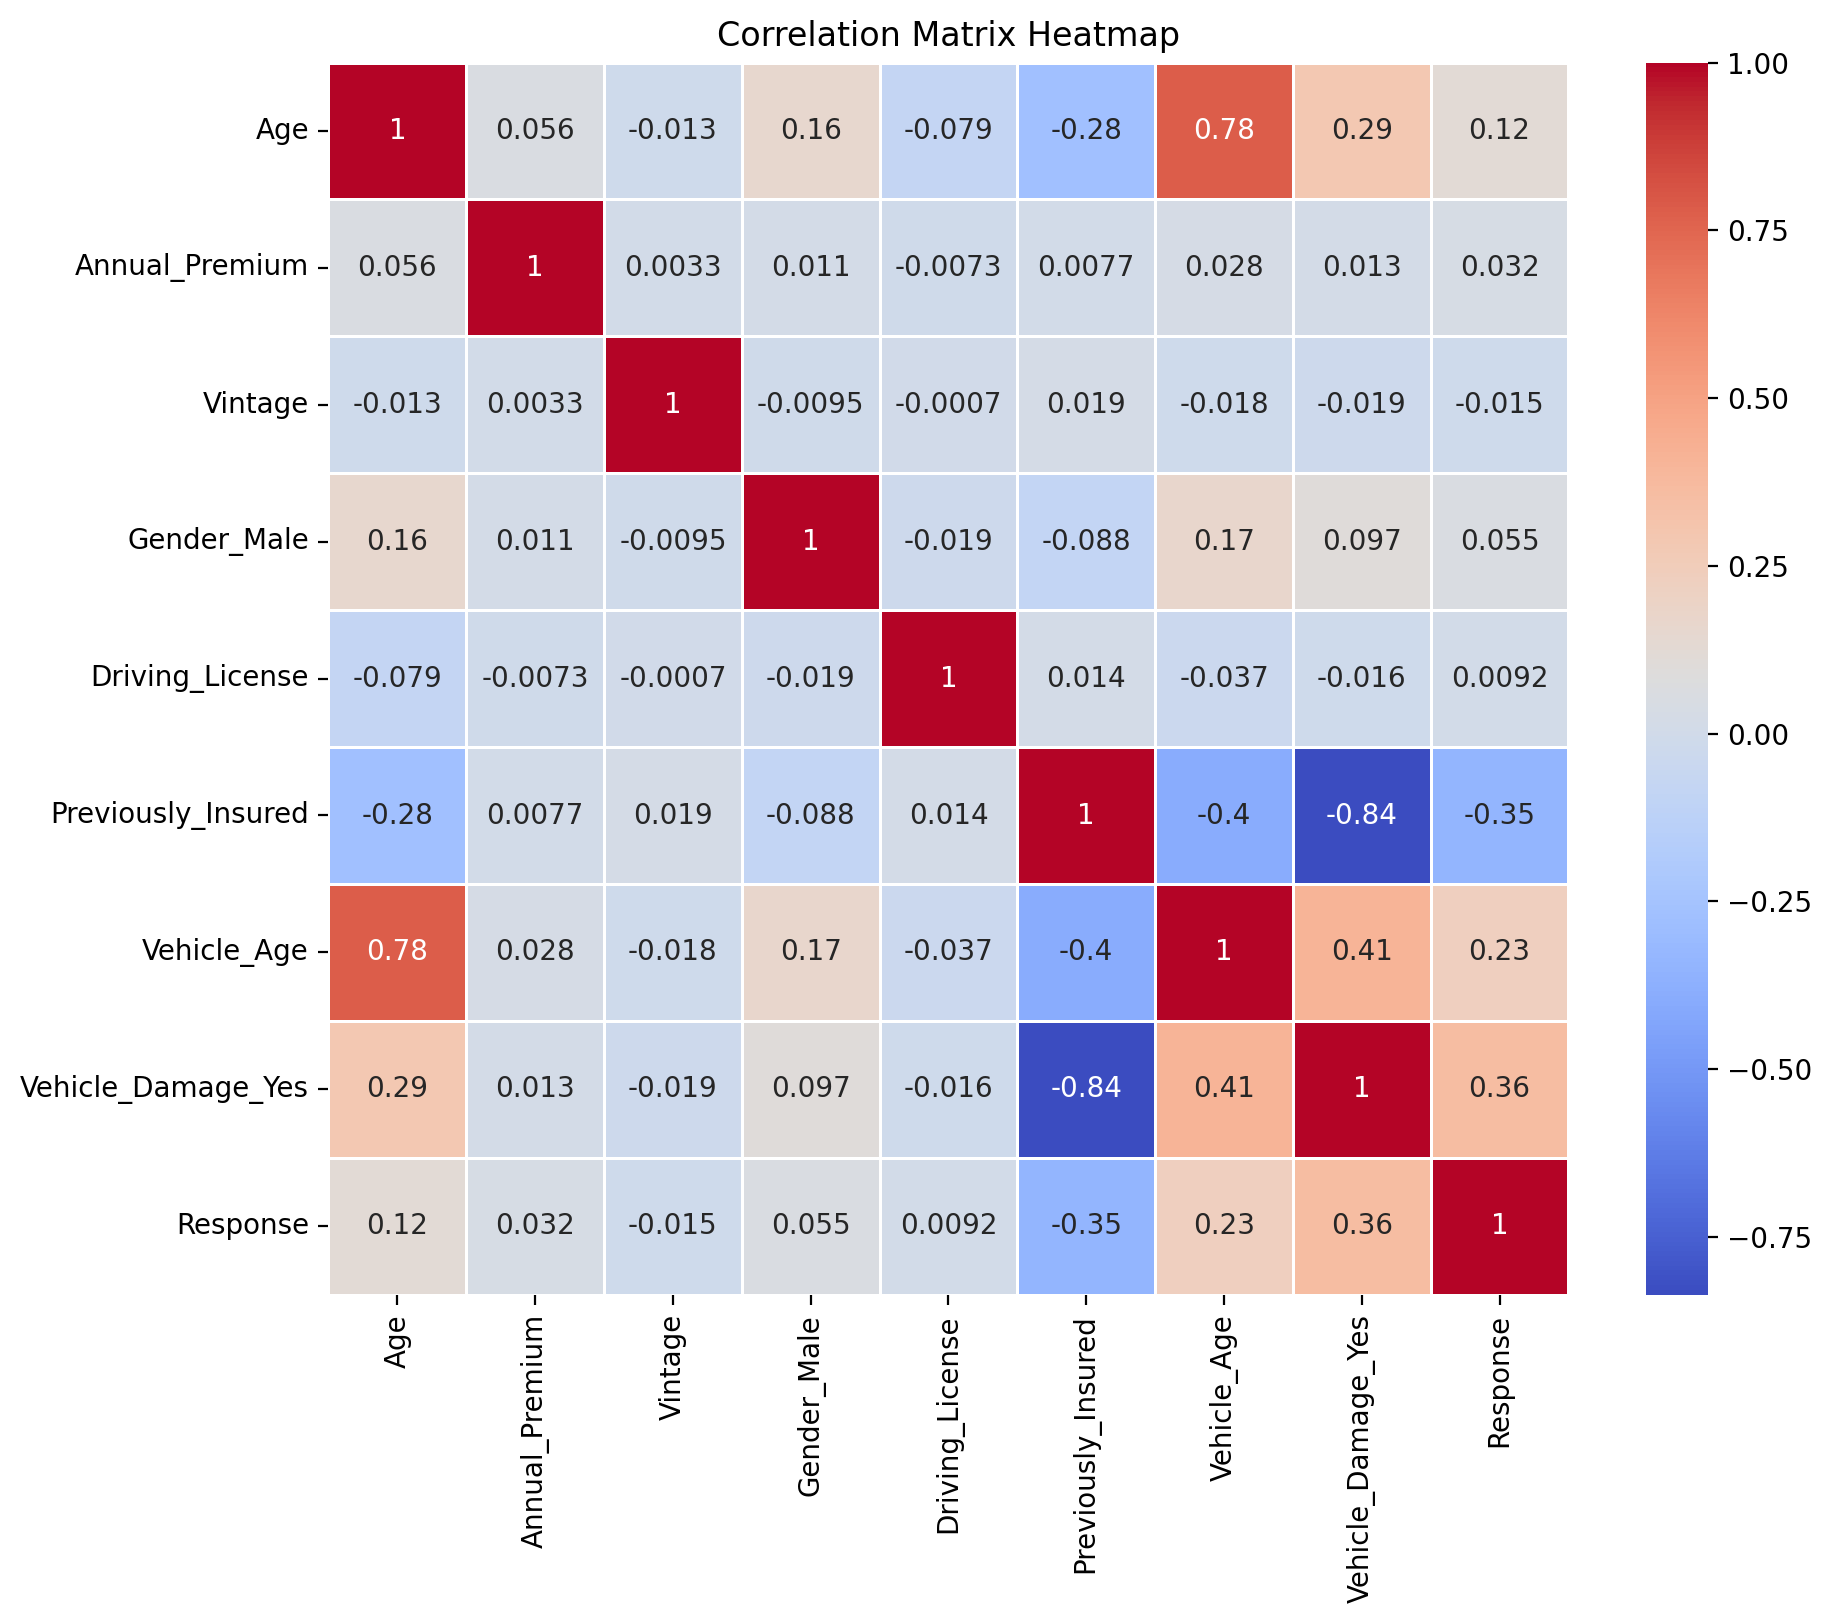

In [49]:
# select columns
cols = numeric_cols + ["Gender_Male", "Driving_License", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage_Yes", "Response"]
corr_matrix = df_master[cols].corr()

# plot heatmap
plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()


There seem to be no collinearity issues. To note: 
1. There is a small "cluster" of positive correlation between Vehicle_Age, Vehicle_damage and Response
2. Vehicle age correlates strongly and positively with Age
3. Previously_Insured correlates negatively with Vehicle_Age (makes sense), Response (speaking to a demand side effect / sustitutability of health and vehicle insurance?) and Vehicle_Damage_Yes (puzzling)

### EDA summary

The variables that seem to have the strongest effects on the target variable are:
1. Age: there's a jump in the Response rate at ~ 35 years and then a steady decline, suggesting we use an Age > 35 dummy in model building
2. Males tend to buy more insurance than females on avg
3. Most sale channels are irrelevant (~30 out of 160 make up 98% of the observations)
4. People with older vehicles are more likely to have damaged vehicles and to purchase insurance.
5. People with older vehicles are more likely to purchase insurance.
5. People with previous insurance almost never purchase new insurance. This a bit puzzling. A possible interpretation is that people with vehicle damage purchase insurance, get the car fixed, and don't purchase it again.

In [ ]:
# TODO: the commit messages are not very informative (updated how? with what functionality?)
# TODO: add the relevant learnings to preprocessing > feature engineering